# Longitudinal Educational Outcomes (LEO) 

## Project problem and hypothesis

#### What is this project about?
For my project I will be using the LEO dataset recently released by the UK government. This dataset captures the study information of students from A-level to undergraduate degree level, and their income 1, 3 and 5 years from graduation. 

#### What problem are you solving? Where does this seem to reside as a machine learning problem? Are you predicting some continuous number, or predicting a binary value?
Using this data I hope to understand what is the most important predictor of a students future 'success' (using income to measure success). Further to that I hope to be able to predict a student's income based on their previous education, demographic information and undergraduate education. Given that income is continuous data, I may choose to explore multiple regression analysis to predict it, or could create income 'classes' to turn it into a classification problem, and use classification models such as logistic regression, or KNN.

#### What kind of impact do you think it could have?
I hope that this project will start to explore this new dataset, and draw attention to some of the applications of it. Further to that, I hope that it will add insight into further education in the UK, and how much value it adds to a student's income. My hypothesis is that a student's background (A-level results and relative disadvantage) is a more important factor in their future success than the university they go to or the subject that they study. This has implications for the higher education sector in terms of how much value universities add, and therefore how much they should be charging.

#### What do you think will have the most impact in predicting the value you are interested in solving for?
I suspect that the features that will have the most impact in predicting income will be prior education (A-levels) and POLAR classification (measure of disadvantage of the students' local area). 

## Datasets

#### Description of the dataset available

The dataset available is shown in the table below.
A description of all of the features of the data is available here: https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/618557/SFR18_2017_metadata.txt
This is what I have been using to interpret the data

## Domain knowledge

#### What experience do you already have around this area?
I am not used to this dataset in particular (it is very new!) but I know my way around national datasets as I use them frequently for my work. I have done some previous projects around the topic of educational attainment, and know many experts in the field. 


#### Does it relate or help inform the project in any way?
The people I have consulted about this project have informed me of the work done around a pre-release of the dataset by an independent think tank: http://wonkhe.com/blogs/a-beginners-guide-to-longitudinal-education-outcomes-leo-data/
This gives a helpful overview of the dataset's main features, and draws some insights from it. 

#### What other research efforts exist?
The other analysis done on this dataset has all been exploratory (to my knowledge). I believe that there haven't been any attempts at modelling the data. 


## Project Concerns

#### What questions do you have about your project? What are you not sure you quite yet understand? 

I have a number of concerns:
* This dataset uses aggregated data, therefore instead of just one income value per student, the dataset gives you a median, upper and lower income value for each student group. I am not sure if this type of data should be treated differently, or which income value to use for prediction (probably the median?). Do I need to pay any attention to the number of students included in each calculation?
* Given the fact that this data is aggregated, the gender feature has 3 classes: male, female and female + male. Unless I can work around this I don't think I will be able to work with the gender variable. 
* If I do try to convert this project into a classification problem, how do I decide which income bands to use?


#### What are the assumptions and caveats to the problem?
The dataset is aggregated, therefore this means that the incomes, prior attainment scores and POLAR classification scores are all aggregates of a larger group, and not at individual level. This must be taken into account when interpreting the results.
The dataset has no information on the final grade of the individual, therefore students with a 3rd and a 1st from a university will be treated the same.
The subject categories are all collections of many different subjects. Therefore some of the subject categories are going to be more varied than others, and may contain a wide variety of courses.

#### What are the risks to the project?
I will be using this model to glean insights about the value of higher education. Therefore the risks of it being wrong are that I humiliate my organisation with a blogpost about it! If the model is accurate however, then it could prove an interesting insight for the higher education sector (including some of the clients that we work with)
There is a very low chance that the data in the model is incorrect.


## Outcomes

#### What do you expect the output to look like?
I am hoping that the eventual outcome will be a short paper delivering the key insights from the data, and discussing which features are an important indicator of future income, and therefore where higher education providors/access charities should be focussing their resources. This will be an accessible paper with some useful figures to demonstrate my points. 

#### What does your target audience expect the output to look like?
My line manager and director will expect a detailed presentation with methodology and model performance information
My office will expect a short presentation with accessible figures, followed up with a blogpost of a similar format.

#### What gain do you expect from your most important feature on its own?
I'm not sure I understand this question - But I think that plotting income against POLAR classification, prior attainment, subject and university will be interesting in of itself. 

#### How complicated does your model have to be?
I would like to create multiple models if possible, to test myself and maximise my learning. The simplest model that I think I could make is a linear regression, followed by a multiple regression and if possible, progressing to the classification models. 

#### How successful does your project have to be in order to be considered a "success"?
It would be successful if I can at least create a multiple regression on the data, and get it performing well!

#### What will you do if the project is a bust?
I will write to the people responsible for releasing the dataset to walk them through the steps I have followed and why the model has broken down. Hopefully this will still be valuable, as they learn how best to apply the data. 
I will still present to my office the data, try to communicate some simpler insights, and explain why I could not model the data. 

# Exploratory data analysis

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

Metadata explaining the variables:

UKPRN				UK Provider Reference Number.
subject				Subject studied.
sex				Sex of graduate.
yearsAfterGraduation		Number of years after graduation. 
grads				Number of graduates included in calculations.
unmatched			Percentage of graduates that have been classed as unmatched.
matched				Number of graduates that have been classed as matched.
activityNotCaptured		Percentage of matched graduates whose activity could not be captured.
noSustDest			Percentage of matched graduates with an unsustained destination.
sustEmpOnly			Percentage of graduates with a record or sustained employment only.
sustEmp				Percentage of graduates with a record or sustained employment (these graduates may or may not have a further study record in addition to a sustained employment record).
sustEmpFSorBoth			Percentage of graduates with a record or sustained employment, a record of further study, or both.
earningsInclude			Number of matched graduates included in earnings calculations.
lowerAnnEarn			Annualised earnings lower quartile.
medianAnnEarn			Median annualised earnings.
upperAnnEarn			Annualised earnings upper quartile.
POLARGrpOne			Percentage of graduates in POLAR group 1 (of those eligible to be included in POLAR calculations).
POLARGrpOneIncluded		Percentage of graduates included in POLAR calculations .
prAttBand			Prior attainment band.
prAttIncluded			Percentage of graduates included in prior attainment calculations.

In [3]:
# I specified the comma as the separator and added in the Na values 
students = pd.read_csv('SFR18_2017_Institution_subject_data.csv', sep=',', na_values=[".",'..', 'x'])

In [4]:
students.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
0,10000291,Anglia Ruskin University,East,Agriculture & related subjects,Female,1,30.0,NaN,NaN,NaN,...,NaN,NaN,20.0,9300.0,14400.0,19500.0,NaN,NaN,NaN,NaN
1,10007759,Aston University,West Midlands,Agriculture & related subjects,Female,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000571,Bath Spa University,South West,Agriculture & related subjects,Female,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10007850,The University of Bath,South West,Agriculture & related subjects,Female,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10007152,University of Bedfordshire,East,Agriculture & related subjects,Female,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A description of all of the features of the data is available here: https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/618557/SFR18_2017_metadata.txt
This is what I have been using to interpret the data

In [5]:
students.shape

(32706, 22)

In [6]:
students.describe()

,UKPRN,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,noSustDest,sustEmpOnly,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
count,3.270600e+04,32706.000000,18807.000000,14901.000000,14901.000000,8141.000000,8141.000000,5780.000000,5791.000000,14811.000000,14453.000000,14453.000000,14453.000000,14453.000000,7216.000000,7216.000000,11563.000000,11563.000000
mean,1.000676e+07,3.000000,96.935450,2.824938,115.182874,9.664194,9.426950,60.921021,75.184562,81.968699,74.987546,17301.598284,22801.625960,28514.121636,11.603645,79.241519,1.870535,65.005760
std,4.290615e+03,1.633018,125.524625,3.322774,127.932521,3.988740,3.950262,11.395854,6.960116,6.557670,80.084134,6024.201198,6802.734934,8802.545630,6.746276,16.878430,0.676488,21.645666
min,1.000029e+07,1.000000,0.000000,0.000000,10.000000,0.900000,1.500000,3.900000,37.500000,41.700000,10.000000,800.000000,5500.000000,10000.000000,0.900000,2.500000,1.000000,0.600000
25%,1.000539e+07,1.000000,20.000000,0.000000,35.000000,6.700000,6.500000,53.800000,71.500000,78.500000,25.000000,13100.000000,18100.000000,22800.000000,6.500000,71.100000,1.000000,50.600000
50%,1.000716e+07,3.000000,60.000000,1.900000,80.000000,9.200000,8.800000,62.800000,76.200000,82.500000,50.000000,16400.000000,21700.000000,26800.000000,10.350000,83.300000,2.000000,69.800000
75%,1.000780e+07,5.000000,130.000000,4.100000,150.000000,11.900000,11.700000,69.400000,80.000000,86.100000,95.000000,20400.000000,26100.000000,32000.000000,15.300000,92.100000,2.000000,83.200000
max,1.004081e+07,5.000000,3540.000000,40.700000,3340.000000,46.400000,30.600000,91.200000,95.300000,100.000000,1870.000000,62600.000000,85500.000000,166100.000000,63.800000,100.000000,3.000000,100.000000


In [7]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32706 entries, 0 to 32705
Data columns (total 22 columns):
UKPRN                   32706 non-null int64
providerName            32706 non-null object
Region                  32706 non-null object
subject                 32706 non-null object
sex                     32706 non-null object
yearsAfterGraduation    32706 non-null int64
grads                   18807 non-null float64
unmatched               14901 non-null float64
matched                 14901 non-null float64
activityNotCaptured     8141 non-null float64
noSustDest              8141 non-null float64
sustEmpOnly             5780 non-null float64
sustEmp                 5791 non-null float64
sustEmpFSorBoth         14811 non-null float64
earningsInclude         14453 non-null float64
lowerAnnEarn            14453 non-null float64
medianAnnEarn           14453 non-null float64
upperAnnEarn            14453 non-null float64
POLARGrpOne             7216 non-null float64
POLARGrpOne

The data was imported with many missing values, making the datatypes varied and difficult to work with. Therefore I have dropped the missing values below.

In [8]:
students = students.dropna(subset = ['yearsAfterGraduation', 'lowerAnnEarn', 'medianAnnEarn', 'upperAnnEarn', 'POLARGrpOne', 'prAttBand'])

In [9]:
students.dtypes

UKPRN                     int64
providerName             object
Region                   object
subject                  object
sex                      object
yearsAfterGraduation      int64
grads                   float64
unmatched               float64
matched                 float64
activityNotCaptured     float64
noSustDest              float64
sustEmpOnly             float64
sustEmp                 float64
sustEmpFSorBoth         float64
earningsInclude         float64
lowerAnnEarn            float64
medianAnnEarn           float64
upperAnnEarn            float64
POLARGrpOne             float64
POLARGrpOneIncluded     float64
prAttBand               float64
prAttIncluded           float64
dtype: object

In [22]:
students.head(10)

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
44,10007146,The University of Greenwich,London,Agriculture & related subjects,Female,1,60.0,0.0,60.0,6.7,...,NaN,76.7,35.0,12000.0,14600.0,17300.0,13.3,50.0,3.0,23.3
46,10040812,Harper Adams University,West Midlands,Agriculture & related subjects,Female,1,150.0,0.7,145.0,3.4,...,86.4,89.8,110.0,14500.0,19200.0,22500.0,5.8,81.6,2.0,57.1
84,10004797,The Nottingham Trent University,East Midlands,Agriculture & related subjects,Female,1,125.0,0.0,125.0,11.2,...,NaN,80.0,75.0,10000.0,13800.0,17400.0,15.1,74.4,2.0,52.0
202,10007146,The University of Greenwich,London,Architecture building & planning,Female,1,50.0,0.0,50.0,22.9,...,52.1,60.4,15.0,18700.0,22800.0,30100.0,19.0,43.8,3.0,39.6
222,10003957,Liverpool John Moores University,North West,Architecture building & planning,Female,1,45.0,2.2,45.0,NaN,...,NaN,88.6,30.0,17600.0,22500.0,26300.0,9.7,70.5,2.0,50.0
239,10001282,University of Northumbria at Newcastle,North East,Architecture building & planning,Female,1,80.0,2.6,75.0,6.6,...,78.9,88.2,50.0,19200.0,23200.0,27100.0,4.9,80.3,2.0,60.5
264,10007156,The University of Salford,North West,Architecture building & planning,Female,1,35.0,2.8,35.0,8.6,...,NaN,82.9,25.0,14400.0,20700.0,24900.0,14.3,60.0,2.0,40.0
280,10007164,University of the West of England Bristol,South West,Architecture building & planning,Female,1,90.0,4.4,85.0,NaN,...,88.4,94.2,65.0,17900.0,21200.0,25900.0,11.5,70.9,2.0,58.1
316,10000291,Anglia Ruskin University,East,Biological sciences,Female,1,95.0,0.0,95.0,7.5,...,74.3,77.5,60.0,12000.0,15300.0,18800.0,13.8,77.5,2.0,62.6
319,10007850,The University of Bath,South West,Biological sciences,Female,1,160.0,0.6,160.0,6.3,...,70.6,85.6,65.0,13100.0,18900.0,22500.0,4.9,89.4,1.0,76.9


In [11]:
students.describe()

,UKPRN,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,noSustDest,sustEmpOnly,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
count,6.475000e+03,6475.000000,6475.000000,6475.000000,6475.000000,5122.000000,5122.000000,3586.000000,3586.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000
mean,1.000625e+07,2.868417,169.447876,2.028463,165.704247,9.166829,9.325068,63.169716,76.007724,82.138610,104.632432,16159.073359,21419.413127,26870.980695,11.553066,79.163923,1.865328,65.851398
std,3.138452e+03,1.628441,160.793883,2.046708,155.900965,3.532233,3.745686,10.023936,6.002544,5.033744,97.235756,4797.828556,5671.964801,7478.009955,6.629819,16.936178,0.641304,19.606650
min,1.000029e+07,1.000000,15.000000,0.000000,15.000000,1.700000,1.800000,25.700000,48.700000,58.700000,10.000000,2500.000000,7600.000000,12700.000000,0.900000,2.500000,1.000000,0.800000
25%,1.000480e+07,1.000000,75.000000,0.400000,75.000000,6.600000,6.600000,56.700000,72.700000,79.200000,45.000000,12700.000000,17400.000000,21800.000000,6.500000,70.900000,1.000000,52.600000
50%,1.000715e+07,3.000000,130.000000,1.500000,130.000000,8.800000,8.800000,64.900000,76.800000,82.500000,80.000000,15500.000000,20700.000000,25600.000000,10.300000,83.200000,2.000000,69.100000
75%,1.000778e+07,5.000000,215.000000,3.100000,210.000000,11.300000,11.575000,70.600000,80.300000,85.500000,135.000000,18900.000000,24500.000000,30100.000000,15.300000,92.000000,2.000000,82.400000
max,1.004081e+07,5.000000,3540.000000,20.600000,3340.000000,28.500000,28.500000,86.800000,93.100000,100.000000,1870.000000,44700.000000,65700.000000,120900.000000,47.800000,100.000000,3.000000,98.000000


My dataframe has now shrunk to 6475 rows. Now I will start to perform exploratory analysis. 

## Exploratory analysis

### Activity not captured

How many students are 'activity not captured'? This means that these graduates have been matched to the DWP’s systems but have no employment or benefits record or further study in the tax year of interest. Activity not captured is expressed as a percentage of the total students in that row.

The explanation for non-captured graduates from DfE is as follows:

'moving out of the UK after graduation for either work or study, being self-employed in the relevant tax year, earning below the Lower Earnings Limit, or voluntarily leaving the labour force'

In [12]:
students.groupby('subject').activityNotCaptured.agg(['min', 'max','count', 'mean']).sort('mean')

/Users/rhiannonbritt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,min,max,count,mean
subject,,,,
Psychology,2.4,21.1,211,7.839810
Biological sciences,2.2,17.3,435,7.927586
Subjects allied to medicine (excluding nursing),2.3,18.7,258,7.955039
Nursing,1.7,17.5,91,8.192308
Mathematical sciences,3.3,17.6,109,8.200917
English studies,2.3,23.8,247,8.470445
Social studies (excluding economics),2.4,20.8,443,8.693454
Physical sciences,2.8,21.8,304,8.743421
Mass communications & documentation,2.4,22.1,254,8.806693


This table shows the figures for the students whose activity could not be captured. These numbers are all percentages. As I am working with aggregated data, each university and subject has a group of students as one datapoint. Therefore the percentage of those students whose activity could not be found is given here. The subject with the highest mean percentage of these students is Languages.

I'm not sure that this tells me that much about the students activity. Becuase those students who could not be found could be doing very varied things e.g. being self employed or voluntarily leaving the labour market or moving abroad, I don't think that we can extrapolate from this data. 

In [13]:
students.groupby('providerName').activityNotCaptured.agg(['min', 'max','count', 'mean']).sort('mean')

/Users/rhiannonbritt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,min,max,count,mean
providerName,,,,
Rose Bruford College,2.6,7.1,5,5.420000
Leeds College of Art,5.8,5.8,1,5.800000
Guildhall School of Music and Drama,4.4,7.9,2,6.150000
The Royal Central School of Speech and Drama,4.1,9.9,5,6.480000
The Arts University Bournemouth,4.8,10.4,9,7.322222
The Liverpool Institute for Performing Arts,4.1,11.4,5,7.360000
The University of York,3.2,13.9,52,7.384615
Royal Northern College of Music,5.7,9.3,2,7.500000
University of Chester,3.1,17.7,52,7.511538


This table is looking at the same groupby, but using the institution. The highest mean percentage of students whose activity could not be captured is at the Schol of Oriental and African Studies. Interestingly the minimum number of students from this school whose activity could not be captured is also very high compared to the rest of the institutions. Perhaps this might be because many of their students move abroad. Again, because the reasons why a student might not be picked up are so varied, it is difficult to extrapolate. 


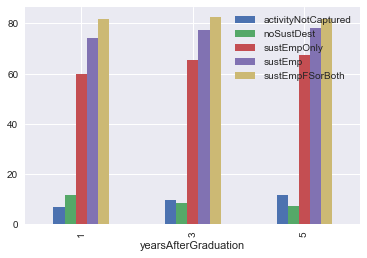

In [14]:
students3 = students.groupby(
    ['yearsAfterGraduation'])['activityNotCaptured', 'noSustDest', 'sustEmpOnly','sustEmp','sustEmpFSorBoth'].mean()
students3.plot(kind='bar')
sns.set(font_scale=1.5) 

The above bar chart shows the destinations of the students 1, 3 and 5 years after graduation. I don't see anything particularly interesting. The activity not captured gradually increases over the years, which is consistent with students being harder to track, as they move on. 

#### Gender

Below is an isolation of a specific subject and datapoint seperately. This is so that I can understand the data further! 

In [15]:
students[(students["providerName"] == "The University of Greenwich") & (students['subject'] == "Agriculture & related subjects")]

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
44,10007146,The University of Greenwich,London,Agriculture & related subjects,Female,1,60.0,0.0,60.0,6.7,...,NaN,76.7,35.0,12000.0,14600.0,17300.0,13.3,50.0,3.0,23.3
10946,10007146,The University of Greenwich,London,Agriculture & related subjects,Male,1,30.0,0.0,30.0,12.9,...,NaN,61.3,15.0,10100.0,12200.0,15300.0,21.4,45.2,2.0,9.7
21848,10007146,The University of Greenwich,London,Agriculture & related subjects,Female + Male,1,90.0,0.0,90.0,8.8,...,NaN,71.4,50.0,10600.0,13900.0,17300.0,15.9,48.4,3.0,18.7
25482,10007146,The University of Greenwich,London,Agriculture & related subjects,Female + Male,3,85.0,4.8,80.0,10.0,...,NaN,81.3,45.0,11300.0,17400.0,21700.0,11.5,32.5,2.0,21.3
29116,10007146,The University of Greenwich,London,Agriculture & related subjects,Female + Male,5,45.0,4.5,40.0,NaN,...,NaN,88.1,30.0,12200.0,19900.0,23800.0,13.6,52.4,2.0,26.2


This table has shown that the gender category contains three categories - male, female and female+male. Due to the fact that this data is aggregated, I have no way of seperating these. 

Any ideas with how to combat this are welcome! For now I will just assume that these datapoints are representative of single sex or mixed cohorts of students. Therefore my gender variable will have 3 values. 

In [16]:
students4 = students.groupby(
    ['sex'])['lowerAnnEarn', 'medianAnnEarn', 'upperAnnEarn'].mean()


students4

,lowerAnnEarn,medianAnnEarn,upperAnnEarn
sex,,,
Female,15343.628088,20307.217165,25173.537061
Female + Male,16557.428068,21944.128009,27481.209630
Male,16092.031352,21369.366427,27218.615284


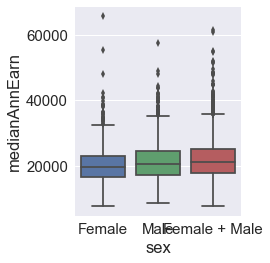

In [17]:
sns.factorplot(
    x='sex',
    y='medianAnnEarn',
    data=students, 
    kind='box'
)

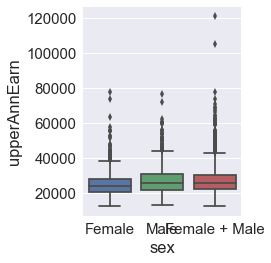

In [18]:
sns.factorplot(
    x='sex',
    y='upperAnnEarn',
    data=students, 
    kind='box'
)

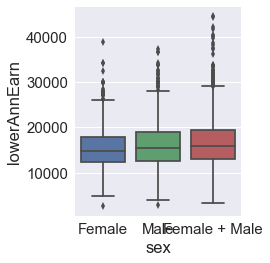

In [19]:
sns.factorplot(
    x='sex',
    y='lowerAnnEarn',
    data=students, 
    kind='box'
)

The gender pay difference is evident here. 

#### Income

Below I have started to explore the data with my target in mind. I am focussing on comparing the variables with the median annual income, which is my target variable. However I have also looked at the upper and lower annual income, to see if there are any large differences. 

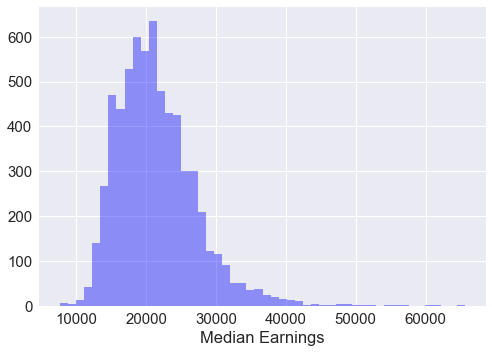

In [21]:
sns.distplot(students['medianAnnEarn'], kde=False, color='b', axlabel='Median Earnings')

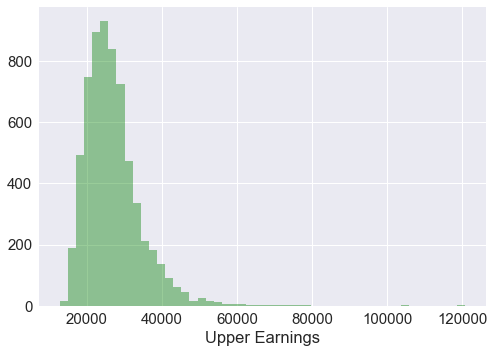

In [232]:
sns.distplot(students['upperAnnEarn'], kde=False, color='g',axlabel='Upper Earnings')

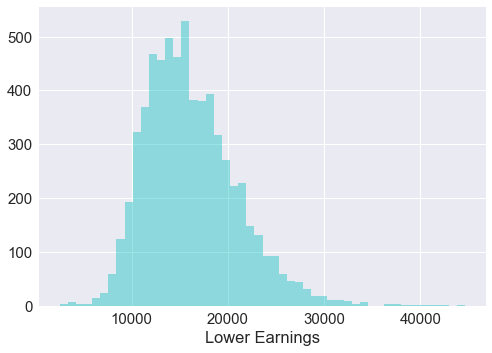

In [233]:
sns.distplot(students['lowerAnnEarn'], kde=False, color='c', axlabel='Lower Earnings')


The distributions of the earnings are all fairly normally distributed. The upper annual earnings has the largest skew. Therefore I think it makes sense to use the median annual earnings as a target variable for this project. 

#### Question: How can I get the skewness of the curves?

#### Prior attainment

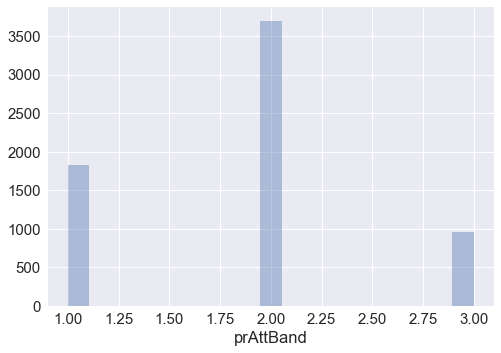

In [234]:
sns.distplot(students['prAttBand'], kde=False)

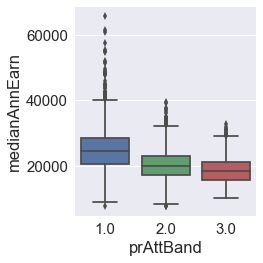

In [235]:
sns.factorplot(
    x='prAttBand',
    y='medianAnnEarn',
    data=students, 
    kind='box'
)

In [236]:
students.groupby('prAttBand').medianAnnEarn.mean()

prAttBand
1.0    25192.223439
2.0    20267.469553
3.0    18659.748428
Name: medianAnnEarn, dtype: float64

In [237]:
students.groupby('prAttBand').medianAnnEarn.describe()

prAttBand       
1.0        count     1826.000000
           mean     25192.223439
           std       6797.197230
           min       7600.000000
           25%      20600.000000
           50%      24500.000000
           75%      28500.000000
           max      65700.000000
2.0        count     3695.000000
           mean     20267.469553
           std       4365.710568
           min       7700.000000
           25%      17000.000000
           50%      20000.000000
           75%      23100.000000
           max      39500.000000
3.0        count      954.000000
           mean     18659.748428
           std       4018.871321
           min      10200.000000
           25%      15600.000000
           50%      18400.000000
           75%      21000.000000
           max      32800.000000
Name: medianAnnEarn, dtype: float64

#### Question: I would like to do a t test to see if these populations are significantly different: how can I do that?

In [238]:
from scipy.stats import ttest_ind

Att1 = students[students['prAttBand']==1]
Att2 = students[students['prAttBand']==2]

ttest_ind(Att1, Att2)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

This plot shows the median annual earnings by prior attainment. The prior attainment band is either 1, 2, or 3. Institutions in England are ranked by the median UCAS points of the graduates in a given subject and cohort; the upper quartile of HEIs forms band 1, the middle 50% form band 2, and the
bottom quartile band 3.

From this plot we can see that the annual income increases with the prior attainment result. So those students with higher prior attainment will earn more in the future. This plot also reveals a lot of outliers in the top band. Therefore these may need to be removed for modelling later on. 

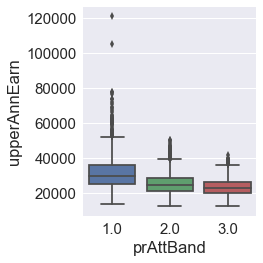

In [239]:
sns.factorplot(
    x='prAttBand',
    y='upperAnnEarn',
    data=students, 
    kind='box'
)

As expected, there is a much larger range in the upper annual earnings, with many more outliers. The trend is the same as before.

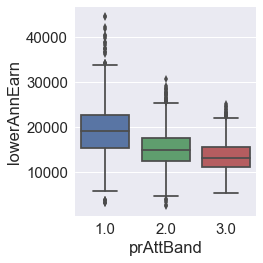

In [240]:
sns.factorplot(
    x='prAttBand',
    y='lowerAnnEarn',
    data=students, 
    kind='box'
)

The trend is similar for the lower annual earnings. However it would appear that there is a larger 'jump' in income from the 2nd to the 1st prior attainment band. This could indicate that at the lower end of the income scale, prior attainment matters much more.

#### Years after graduation

In [241]:
students.groupby('yearsAfterGraduation').medianAnnEarn.describe()

yearsAfterGraduation       
1                     count     2373.000000
                      mean     17736.198904
                      std       3798.864907
                      min       7700.000000
                      25%      15000.000000
                      50%      17000.000000
                      75%      19900.000000
                      max      38200.000000
3                     count     2155.000000
                      mean     22013.921114
                      std       4669.831582
                      min       7600.000000
                      25%      18700.000000
                      50%      21200.000000
                      75%      24300.000000
                      max      51700.000000
5                     count     1947.000000
                      mean     25250.487930
                      std       5803.467043
                      min      10000.000000
                      25%      21300.000000
                      50%      24400.000000
    

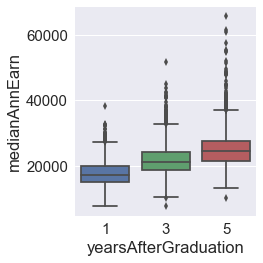

In [242]:
sns.factorplot(
    x='yearsAfterGraduation',
    y='medianAnnEarn',
    data=students, 
    kind='box'
)

At first thought it may appear as if 'years aftern graduation' is a time series. However this data set has just been captured at one timepoint, therefore these are different groups of students, that happen to be at 1, 3 or 5 years after graduation. Therefore we can treat it as another feature.
Unexpectedly, annual income increases as the years after graduation increases. Again there are many outliers in this datset, particulary in the 5 years after graduation datapoints. 

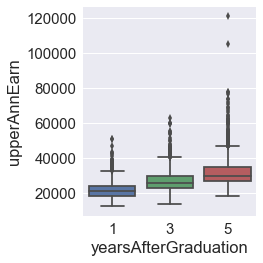

In [243]:
sns.factorplot(
    x='yearsAfterGraduation',
    y='upperAnnEarn',
    data=students,
    kind='box')

A similar pattern is observed for the upper annual earnings. There are some very large outliers, as we would expect with the highest earners! 

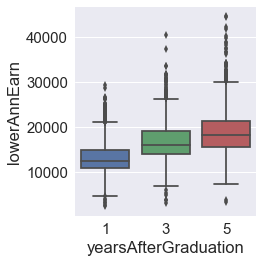

In [244]:
sns.factorplot(
    x='yearsAfterGraduation',
    y='lowerAnnEarn',
    data=students,
    kind='box')

A similar pattern can be seen for the lower income bands. However, unlike for the prior attainment feature, there is not such a large increase in income for the lower earners as they spend longer in the labour market? Although I am just looking at this visually, so the impact of that might be small. 

#### Question: Given that there are outliers on all of the plots that I have plotted above (prior attainment and years after graduation) how do I know which outliers to remove? All of them?

#### POLAR classification

The Participation of Local Areas classification (known as POLAR) is a UK-wide area-based measure that groups geographical areas according to the proportion of young people living in them who participate in higher education (HE) by the age of 19. This is known as the ‘young participation rate’. The POLAR classification is used for a variety of purposes, perhaps most importantly to distribute HEFCE’s student opportunity allocation to higher education institutions, and for the monitoring of local and national patterns of young HE participation.
There are 5 quintiles into which an area can score, with 1 having the lowest participation. 

This feature could stand as a rough measure of disadvantage, however this is a tenuous link. 
This report: http://www.hefce.ac.uk/pubs/year/2014/201401/ found the following:
The POLAR3 classification is found to correlate with other measures of disadvantage, though in many cases the correlation is not as strong as might be assumed. For example there are several wards which have among the highest young HE participation rates but are classed by other measures as being more disadvantaged than some wards which have average young HE participation rates. These findings demonstrate that POLAR captures a specific form of disadvantage – namely, educational disadvantage relating to participation in higher education – that is different from the types of disadvantage captured by other measures. This means that the POLAR classification is not necessarily an appropriate substitute for other measures of disadvantage, and users of the classification should bear this in mind.

With this caveat in mind, I will treat the POLAR classification as a rough measure of disadvantage.

The actual data feature is:
Proportion in POLAR3 quintile 1: graduates in quinitile 1 (most disadvantaged) of POLAR3 as a proportion of those non-mature students. 

In [245]:
students.POLARGrpOne.describe()

count    6475.000000
mean       11.553066
std         6.629819
min         0.900000
25%         6.500000
50%        10.300000
75%        15.300000
max        47.800000
Name: POLARGrpOne, dtype: float64

I am assuming that this measure is a percentage. But I haven't been able to confirm this.

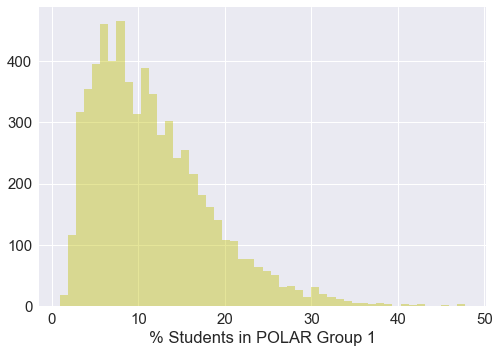

In [246]:
sns.distplot(students['POLARGrpOne'], kde=False, color='y', axlabel='% Students in POLAR Group 1')


This is a bit of a skewed normal distribution

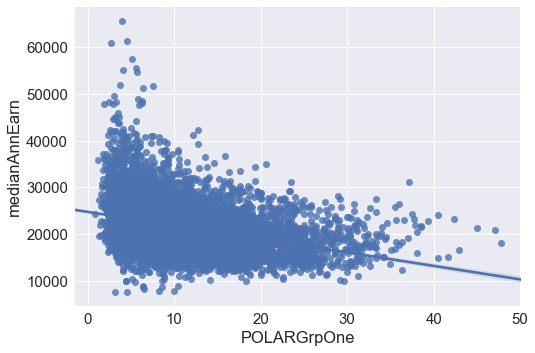

In [247]:
sns.regplot('POLARGrpOne', 'medianAnnEarn', data=students)

This scatter graph is quite tricky to interpret. There does seem to be a trend: as the proportion of students from the most disadvantaged backgrounds increases, the income decreases. HOwever this plot has quite a consistent 'floor' to it. So throughout the POLARGropOne values, there are always students on the wage floor. The only difference is that with the less disadvantaged students, there are some very high earners. 

Below I experiment with the same data but different plotting methods

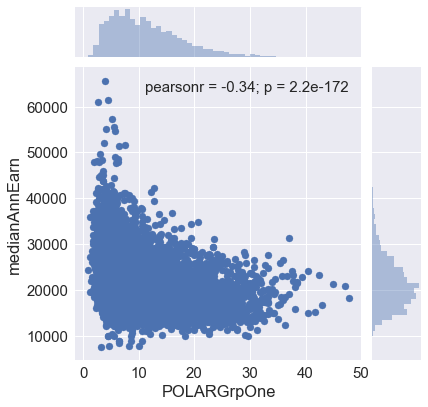

In [248]:
sns.jointplot(x="POLARGrpOne", y="medianAnnEarn", data=students);

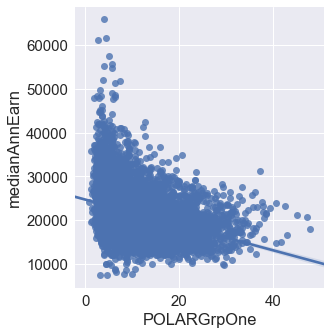

In [249]:
sns.lmplot('POLARGrpOne','medianAnnEarn', students)


#### Question: How do I work out the coefficients and confidence intervals of this line?
Maybe do a resampling of this data? 

Log transform the data to see if that provides a better model. 

In [250]:
log_columns = ['POLARGrpOne', 'medianAnnEarn','upperAnnEarn','lowerAnnEarn']
log_students1 = students.copy()
log_students1[log_columns] = log_students1[log_columns].apply(np.log10)

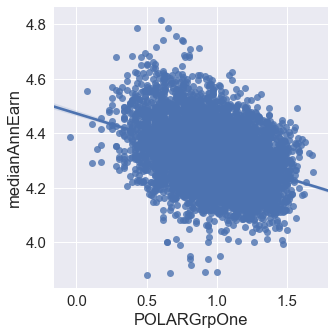

In [251]:
sns.lmplot('POLARGrpOne','medianAnnEarn', log_students1)

Log transforming the data has got rid of the 'floor' of the data. Therefore there is now a clearer relationship between POLAR group and annual earnings. 

#### Question: Log transforming the data has got rid of the 'floor'. Is this therefore the data that I should use for modelling? 

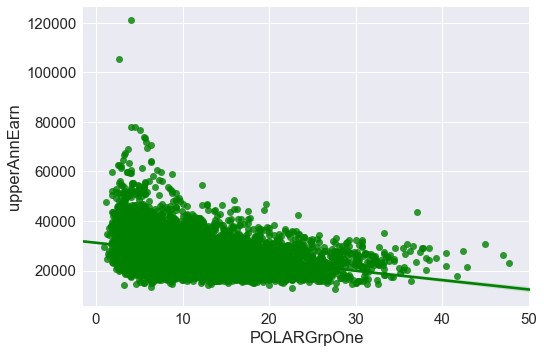

In [252]:
sns.regplot('POLARGrpOne', 'upperAnnEarn', students, color='g')

This relationship is similar to the one above. And again has a floor. Lets take the log and see if we can look further at the relationship. 

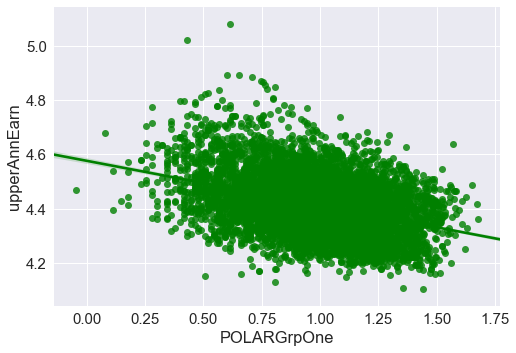

In [253]:
sns.regplot('POLARGrpOne', 'upperAnnEarn', log_students1, color='g')

The log of the plot has made it easier to see this relationship.

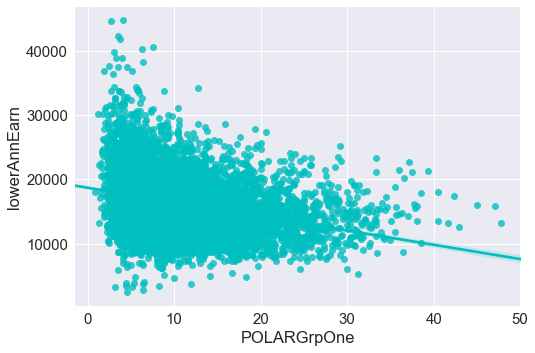

In [254]:
sns.regplot('POLARGrpOne', 'lowerAnnEarn', students, color='c')

The lower annual earnings against POLAr group shows a similar pattern. In general there is a downward trend, and the annual earnings fall as the POLAR group 1 proportion increases. (It also seems as if there is less data at the higher proportion POLAR group 1 end)
The 'floor' is again present. And there is a much larger range of income at the lower end of the POLAR scale. 

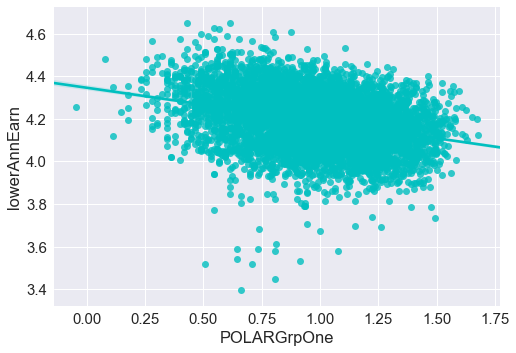

In [255]:
sns.regplot('POLARGrpOne', 'lowerAnnEarn', log_students1, color='c')

Log transforming the data has got rid of the 'floor', however there appear to be some outlier low earners throughout the data. 

The plot below shows the median annual earnings by POLAR group for 1, 3, and 5 years after graduation

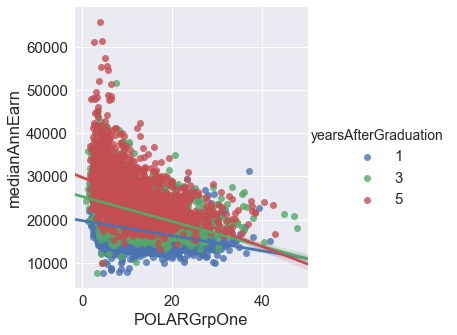

In [256]:
sns.lmplot(x='POLARGrpOne', y="medianAnnEarn", hue="yearsAfterGraduation", data=students)

This plot shows that the gradients of the lines are all differnet. the steepest line is 5 years after graduation. Does this imply that the affects of disadvantage get more pronounced as people move through their careers? Or is this simply a quirk of the strangly distributed data?
Apply the same method to the log transformed data.

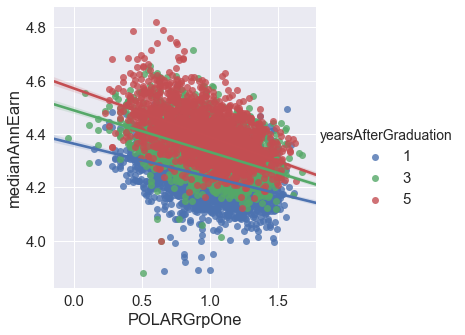

In [257]:
sns.lmplot(x='POLARGrpOne', y="medianAnnEarn", hue="yearsAfterGraduation", data=log_students1)

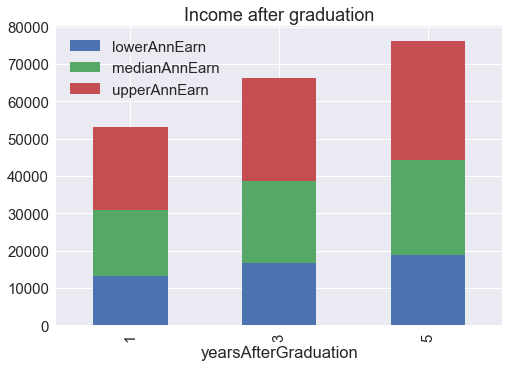

In [258]:
students2 = students.groupby(
    ['yearsAfterGraduation'])['lowerAnnEarn', 'medianAnnEarn', 'upperAnnEarn'].mean()
students2.plot(kind='bar', stacked=True, title='Income after graduation')


#### Subject and institution

Below follows some simple charts to describe the subject and institution features.

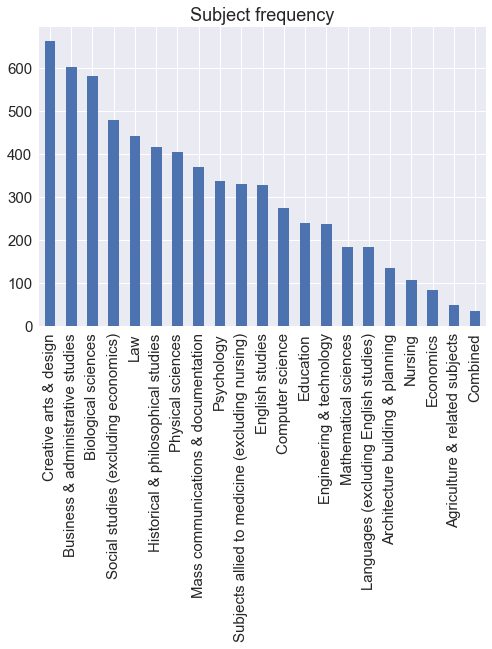

In [259]:
students.subject.value_counts().plot(kind='bar', x='subject', 
              title='Subject frequency')

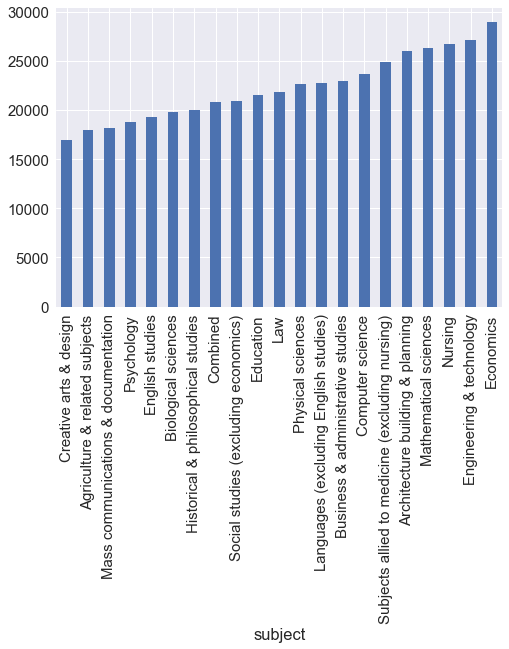

In [260]:
students.groupby('subject').medianAnnEarn.mean().sort_values().plot(kind='bar')

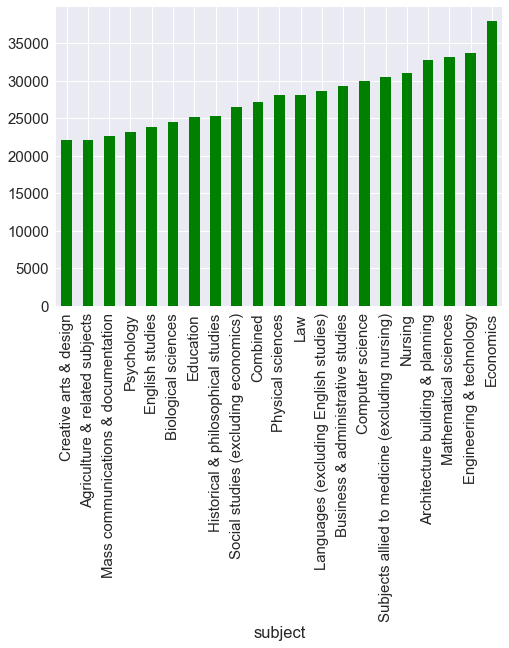

In [261]:
students.groupby('subject').upperAnnEarn.mean().sort_values().plot(kind='bar', color='g')

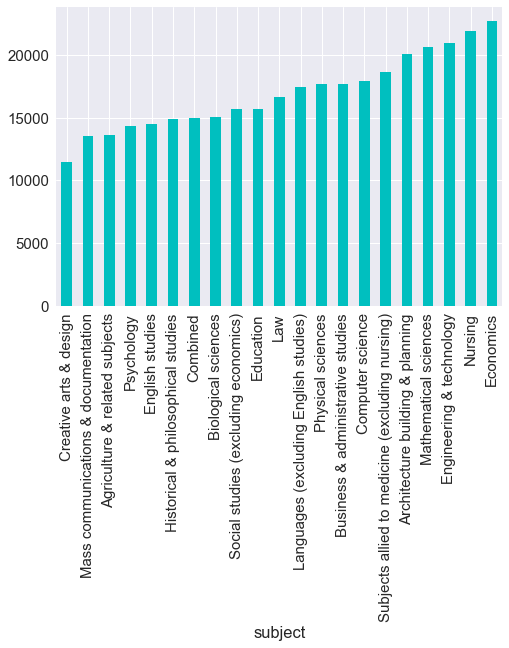

In [262]:
students.groupby('subject').lowerAnnEarn.mean().sort_values().plot(kind='bar', color='c')

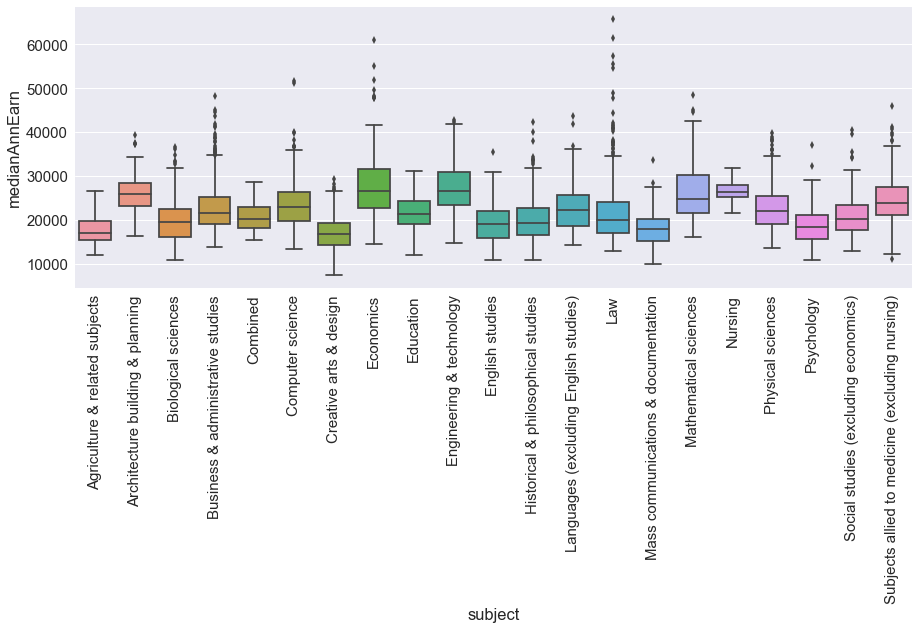

In [263]:
g = sns.factorplot(
    x='subject',
    y='medianAnnEarn',
    data=students, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)
#sns.set(font_scale=1)

In [264]:
University = students.groupby('providerName').medianAnnEarn.mean().sort_values(ascending=False)
print University.head()

providerName
London School of Economics and Political Science       34835.294118
The University of Oxford                               34276.086957
Imperial College of Science Technology and Medicine    33722.727273
The University of Cambridge                            33550.000000
The University of Bath                                 29860.000000
Name: medianAnnEarn, dtype: float64


In [265]:
g = sns.factorplot(
    x='subject',
    y='medianAnnEarn','lowerAnnEarn','upperAnnEarn',
    data=students,
    size=5, 
    aspect=3
)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-265-f1b5562e0d96>, line 3)

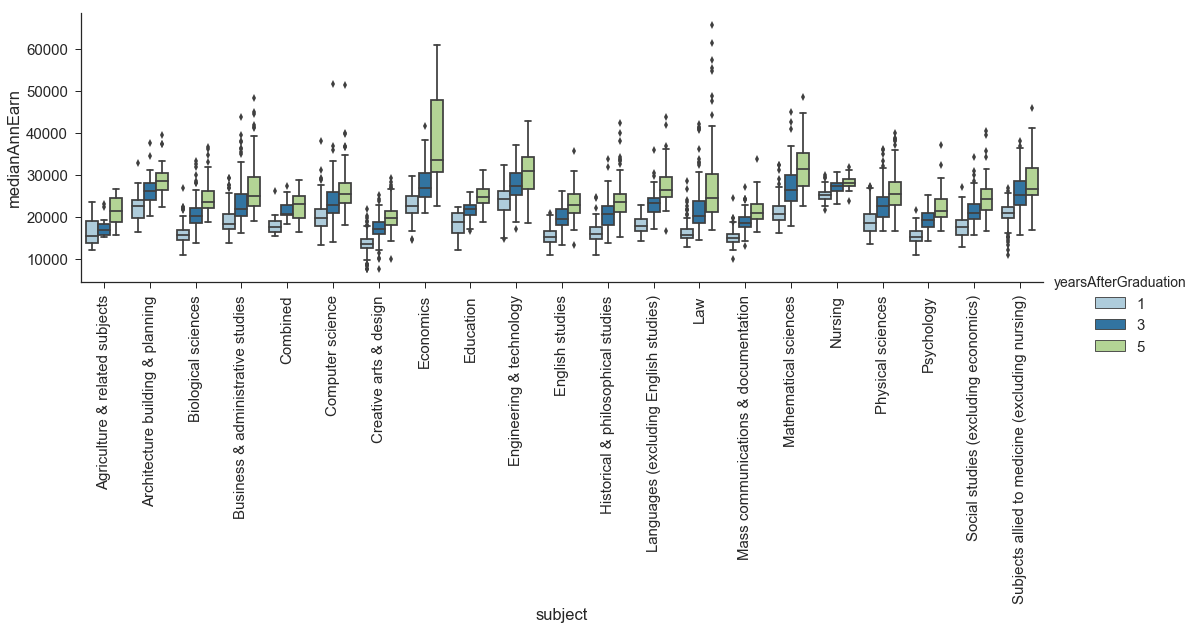

In [266]:
sns.set_style("ticks")
#darkgrid, whitegrid, dark, white, and ticks

current_palette_7 = sns.color_palette("Paired")
sns.set_palette(current_palette_7)
g = sns.factorplot(
    x='subject',
    y='medianAnnEarn',
    hue='yearsAfterGraduation',
    data=students, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

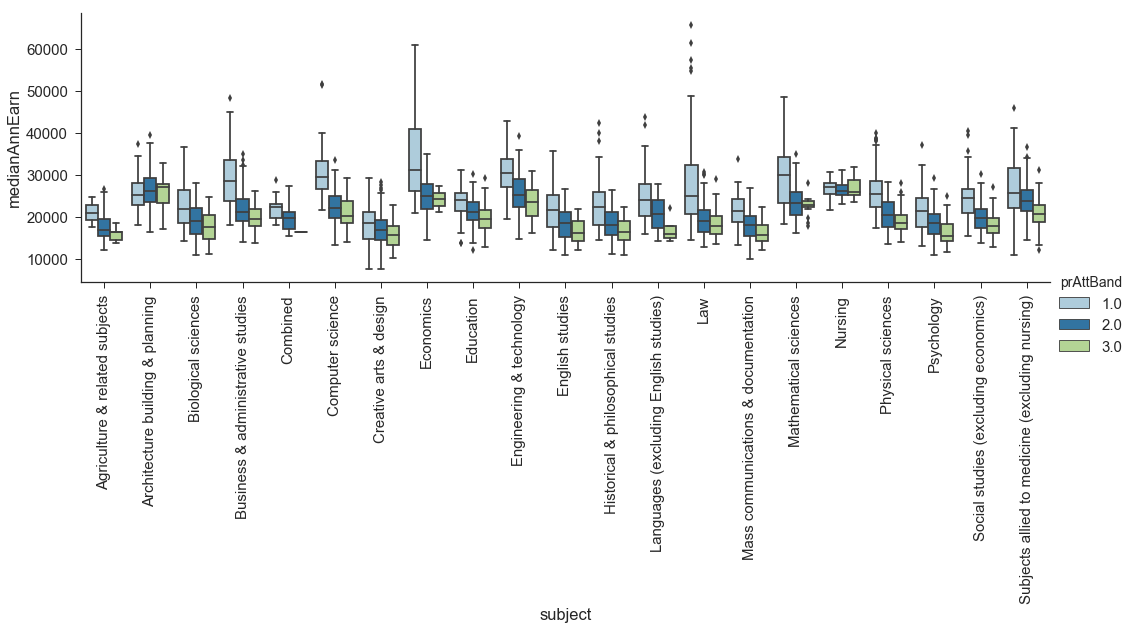

In [267]:
sns.set_style("ticks")
#darkgrid, whitegrid, dark, white, and ticks

g = sns.factorplot(
    x='subject',
    y='medianAnnEarn',
    hue='prAttBand',
    data=students, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

plt.savefig('sample.pdf')

In [269]:
studentssex = students[students["sex"] != 'Female + Male']

In [271]:
studentssex

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
44,10007146,The University of Greenwich,London,Agriculture & related subjects,Female,1,60.0,0.0,60.0,6.7,...,NaN,76.7,35.0,12000.0,14600.0,17300.0,13.3,50.0,3.0,23.3
46,10040812,Harper Adams University,West Midlands,Agriculture & related subjects,Female,1,150.0,0.7,145.0,3.4,...,86.4,89.8,110.0,14500.0,19200.0,22500.0,5.8,81.6,2.0,57.1
84,10004797,The Nottingham Trent University,East Midlands,Agriculture & related subjects,Female,1,125.0,0.0,125.0,11.2,...,NaN,80.0,75.0,10000.0,13800.0,17400.0,15.1,74.4,2.0,52.0
202,10007146,The University of Greenwich,London,Architecture building & planning,Female,1,50.0,0.0,50.0,22.9,...,52.1,60.4,15.0,18700.0,22800.0,30100.0,19.0,43.8,3.0,39.6
222,10003957,Liverpool John Moores University,North West,Architecture building & planning,Female,1,45.0,2.2,45.0,NaN,...,NaN,88.6,30.0,17600.0,22500.0,26300.0,9.7,70.5,2.0,50.0
239,10001282,University of Northumbria at Newcastle,North East,Architecture building & planning,Female,1,80.0,2.6,75.0,6.6,...,78.9,88.2,50.0,19200.0,23200.0,27100.0,4.9,80.3,2.0,60.5
264,10007156,The University of Salford,North West,Architecture building & planning,Female,1,35.0,2.8,35.0,8.6,...,NaN,82.9,25.0,14400.0,20700.0,24900.0,14.3,60.0,2.0,40.0
280,10007164,University of the West of England Bristol,South West,Architecture building & planning,Female,1,90.0,4.4,85.0,NaN,...,88.4,94.2,65.0,17900.0,21200.0,25900.0,11.5,70.9,2.0,58.1
316,10000291,Anglia Ruskin University,East,Biological sciences,Female,1,95.0,0.0,95.0,7.5,...,74.3,77.5,60.0,12000.0,15300.0,18800.0,13.8,77.5,2.0,62.6
319,10007850,The University of Bath,South West,Biological sciences,Female,1,160.0,0.6,160.0,6.3,...,70.6,85.6,65.0,13100.0,18900.0,22500.0,4.9,89.4,1.0,76.9


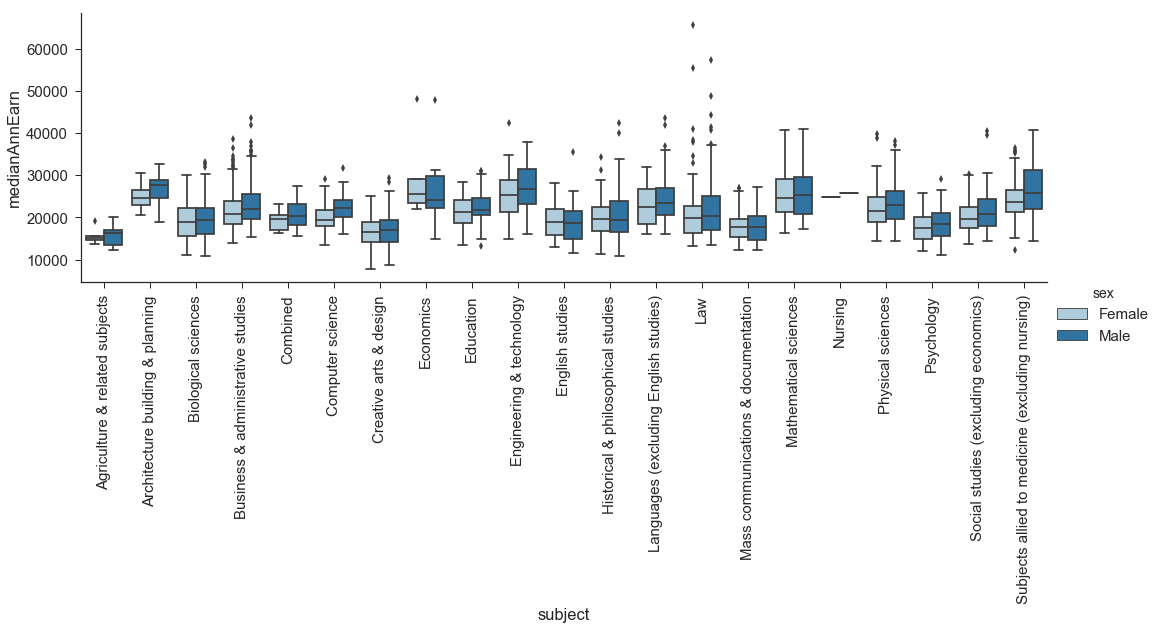

In [272]:
g = sns.factorplot(
    x='subject',
    y='medianAnnEarn',
    hue='sex',
    data=studentssex, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

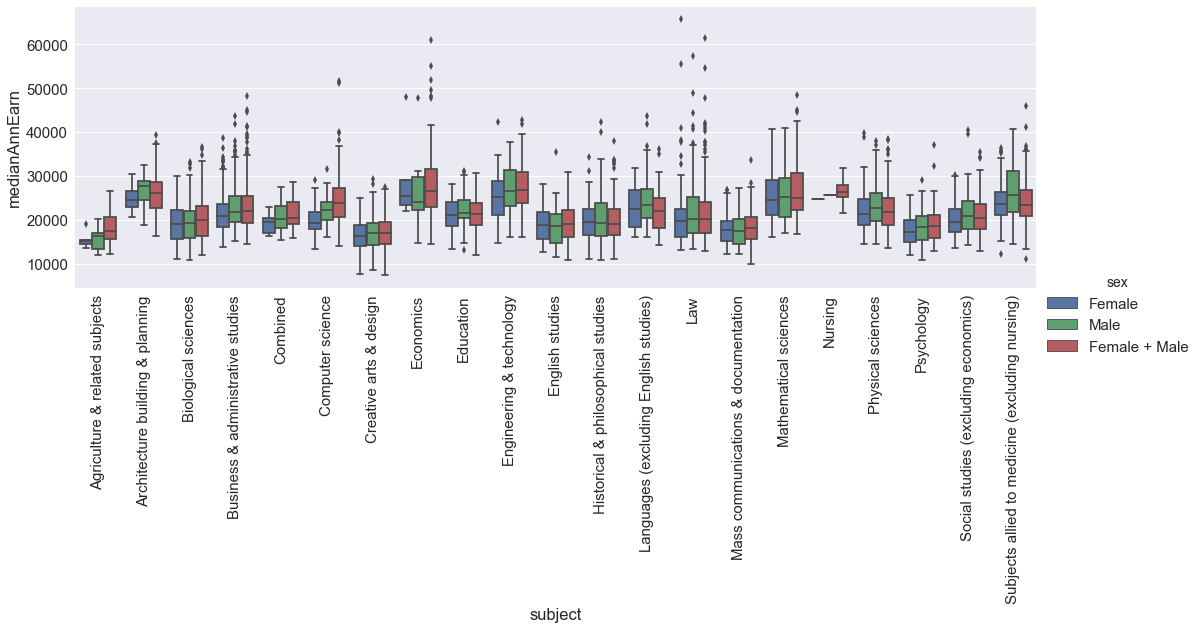

In [23]:
g = sns.factorplot(
    x='subject',
    y='medianAnnEarn',
    hue='sex',
    data=students, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

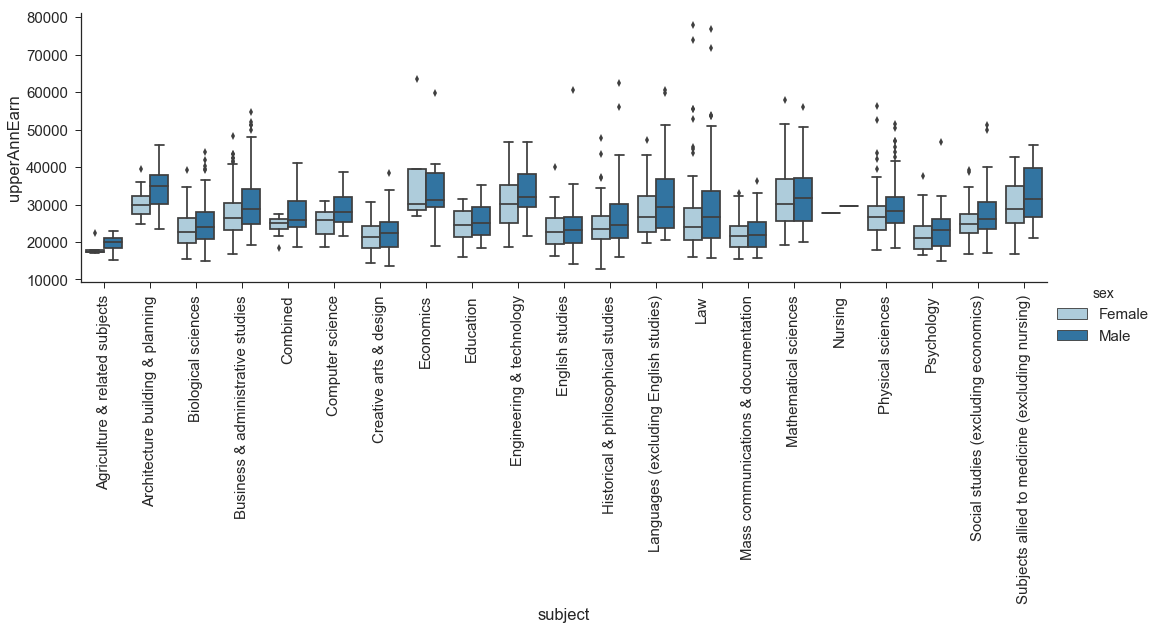

In [273]:
g = sns.factorplot(
    x='subject',
    y='upperAnnEarn',
    hue='sex',
    data=studentssex, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

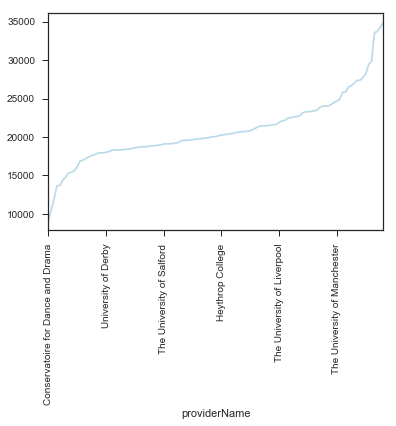

In [179]:
students.groupby('providerName').medianAnnEarn.mean().sort_values().plot(alpha=0.75, rot=90)


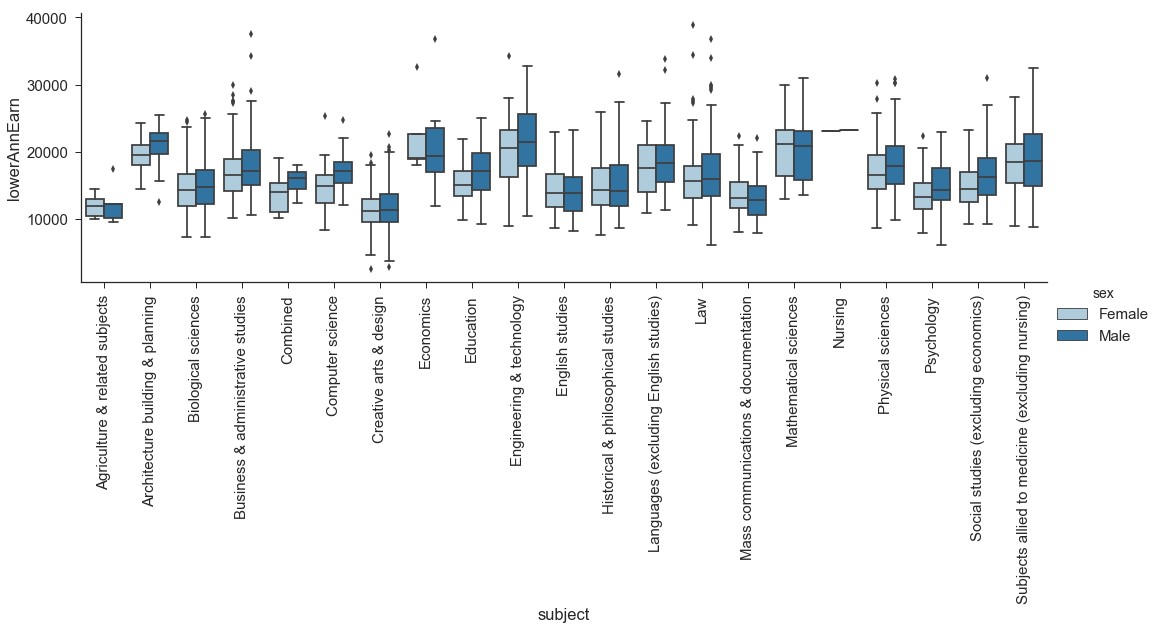

In [274]:
g = sns.factorplot(
    x='subject',
    y='lowerAnnEarn',
    hue='sex',
    data=studentssex, 
    kind='box',
    size=5, 
    aspect=3
)
g.set_xticklabels(rotation=90)

In [153]:
m = pd.DataFrame(students.groupby('subject').medianAnnEarn.mean())

In [154]:
l = pd.DataFrame(students.groupby('subject').lowerAnnEarn.mean())

In [155]:
u = pd.DataFrame(students.groupby('subject').upperAnnEarn.mean())

In [156]:
l['medianAnnEarn']=m['medianAnnEarn']

In [157]:
l['upperAnnEarn']=u['upperAnnEarn']

In [282]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

ax = l.plot.scatter(x='subject', y='medianAnnEarn', color='DarkBlue', label='Median');
l.plot.scatter(x='subject', y='upperAnnEarn', color='DarkGreen', label='Upper', ax=ax);

AttributeError: 'function' object has no attribute 'scatter'

In [169]:
fig.show()

/Users/rhiannonbritt/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [ ]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [144]:
m.plot(kind='scatter')

ValueError: scatter requires and x and y column

This seems like an interesting distribution!

In [50]:
students.providerName.describe()

count                      32706
unique                       158
top       The University of Bath
freq                         207
Name: providerName, dtype: object

### Model attempt 1 - Regression

In [51]:
students.corr()

,UKPRN,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,noSustDest,sustEmpOnly,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
UKPRN,1.000000,0.000000,-0.055015,0.040273,-0.041145,-0.005428,-0.091028,-0.097261,-0.017665,0.060221,-0.053131,0.027946,0.016871,0.011959,0.032921,0.041308,-0.092405,0.052654
yearsAfterGraduation,0.000000,1.000000,-0.051079,0.298512,-0.054397,0.449384,-0.405529,0.290555,0.254627,-0.053204,-0.026587,0.366617,0.444745,0.462229,-0.032312,-0.028507,-0.018463,0.004224
grads,-0.055015,-0.051079,1.000000,0.005565,0.999258,-0.071564,-0.089391,0.292693,0.186369,0.012599,0.977076,-0.002965,0.005478,-0.000601,-0.199691,-0.167703,-0.046628,-0.153261
unmatched,0.040273,0.298512,0.005565,1.000000,-0.017226,0.265469,-0.189131,0.179994,0.176102,-0.028476,0.002283,0.104742,0.138432,0.139532,0.046869,-0.275042,0.088264,-0.263831
matched,-0.041145,-0.054397,0.999258,-0.017226,1.000000,-0.081298,-0.082220,0.291096,0.183731,0.013119,0.977512,-0.004390,0.004969,-0.001374,-0.203029,-0.158496,-0.049639,-0.146132
activityNotCaptured,-0.005428,0.449384,-0.071564,0.265469,-0.081298,1.000000,-0.046686,-0.011623,-0.335109,-0.694126,-0.083526,0.150555,0.228529,0.291535,-0.082909,-0.071503,0.024639,-0.101765
noSustDest,-0.091028,-0.405529,-0.089391,-0.189131,-0.082220,-0.046686,1.000000,-0.216033,-0.551786,-0.686605,-0.107985,-0.368672,-0.372420,-0.359486,0.029305,0.034045,0.235144,-0.085211
sustEmpOnly,-0.097261,0.290555,0.292693,0.179994,0.291096,-0.011623,-0.216033,1.000000,0.702656,0.053641,0.416235,0.146325,0.138708,0.120335,0.125554,-0.161009,0.260699,-0.190858
sustEmp,-0.017665,0.254627,0.186369,0.176102,0.183731,-0.335109,-0.551786,0.702656,1.000000,0.556463,0.263394,0.238108,0.198060,0.147892,0.193302,-0.198766,0.133099,-0.169735
sustEmpFSorBoth,0.060221,-0.053204,0.012599,-0.028476,0.013119,-0.694126,-0.686605,0.053641,0.556463,1.000000,0.009123,0.132837,0.081467,0.027046,0.060945,0.043553,-0.150430,0.110725


The correlations I am most interested in are the correlations between the earnings, the prior attainment band and the POLAR classification. 

We can see that there is a negative correlation between the prior attainment band and earnings, and also a negative correlation between earnings and POLAR group. 

KeyError: 'Level network must be same as name (None)'

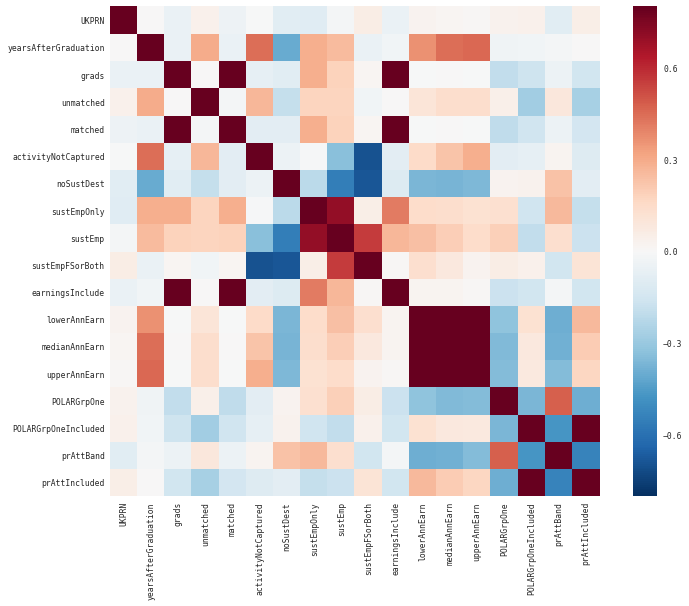

In [52]:
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")
corrmat = students.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

Axes(0.125,0.125;0.62x0.755)


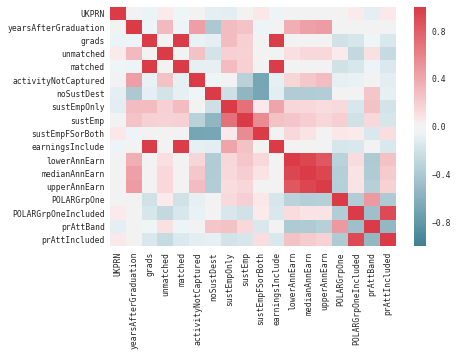

In [53]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = students.corr()

print sns.heatmap(correlations, cmap=cmap)

### Linear regression: POLAR group and annual earnings

MedianAnnearn:

In [54]:

import statsmodels.formula.api as smf
X = students[['POLARGrpOne']]
y = students['medianAnnEarn']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the following syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=students).fit()
#print the full summary
lm.summary()
#These p values are from the hypothesis that there is no effect on the dependent variable I think
#std err and t and P are all derived based on an assumnption that things are normally distributed I think



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 22 Jul 2017   Prob (F-statistic):          4.90e-209
Time:                        15:53:10   Log-Likelihood:                -72495.
No. Observations:                7176   AIC:                         1.450e+05
Df Residuals:                    7174   BIC:                         1.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.554e+04    139.299    183.335      0.000    2.53e+04    2.58e+04
X           -333.7277     10.459    -31.908      0.000    -354.231    -313.225
==============================================================================
Omnibus:                     1784.314   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5300.345
Skew:                           1.286   Prob(JB):                         0.00
Kurtosis:                       6.334   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is very low here. This tells us that not much of the change in earnings can be accounted for by the change in POLAR group. 

Very crudely: a percentage increase in the number of students from POLAR group 1 is associated with a £288 decrease in earnings

In [55]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    #The residuals are the difference between what we get and what we predict. These are not squared
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print('P Values:', pvals)
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    plt.figure()
    #Plotting the distribution of the residuals
    sns.distplot(residuals)
    # keep the model
    return algo

X = students[['medianAnnEarn']]
y = students['POLARGrpOne']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The residuals are normally distributed around 0 for this model. 

UpperAnnearn:

In [56]:
X = students[['POLARGrpOne']]
y = students['upperAnnEarn']

lm = smf.ols(formula='y ~ X', data=students).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     987.3
Date:                Sat, 22 Jul 2017   Prob (F-statistic):          3.74e-203
Time:                        15:54:51   Log-Likelihood:                -74024.
No. Observations:                7176   AIC:                         1.481e+05
Df Residuals:                    7174   BIC:                         1.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.174e+04    172.379    184.110      0.000    3.14e+04    3.21e+04
X           -406.6760     12.943    -31.421      0.000    -432.048    -381.304
==============================================================================
Omnibus:                     2761.213   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20794.951
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                      10.658   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:

X = students[['POLARGrpOne']]
y = students['upperAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

LowerAnnEarn:

In [58]:
X = students[['POLARGrpOne']]
y = students['lowerAnnEarn']

lm = smf.ols(formula='y ~ X', data=students).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     836.5
Date:                Sat, 22 Jul 2017   Prob (F-statistic):          4.43e-174
Time:                        15:55:09   Log-Likelihood:                -71651.
No. Observations:                7176   AIC:                         1.433e+05
Df Residuals:                    7174   BIC:                         1.433e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.959e+04    123.842    158.149      0.000    1.93e+04    1.98e+04
X           -268.9402      9.299    -28.923      0.000    -287.168    -250.712
==============================================================================
Omnibus:                     1651.894   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4660.537
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       6.120   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X = students[['POLARGrpOne']]
y = students['lowerAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

The R squared values are really crap! So I think this is quite a bad predictor of earnings.

#### Removing outliers of income

In [64]:
#keep only the ones that are within +3 to -3 standard deviations
students = students[np.abs(students.medianAnnEarn-students.medianAnnEarn.mean())<=(3*students.medianAnnEarn.std())] 

students = students[np.abs(students.upperAnnEarn-students.upperAnnEarn.mean())<=(3*students.upperAnnEarn.std())] 

students = students[np.abs(students.lowerAnnEarn-students.lowerAnnEarn.mean())<=(3*students.lowerAnnEarn.std())] 

students.describe()

,UKPRN,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,noSustDest,sustEmpOnly,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
count,6.325000e+03,6325.000000,6325.000000,6325.000000,6325.000000,4998.000000,4998.000000,3519.000000,3519.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000
mean,1.000624e+07,2.829249,169.856917,2.023937,166.101186,9.076391,9.388695,63.184427,76.022705,82.162198,104.845059,15837.280632,20992.743083,26252.553360,11.701091,78.810451,1.884111,65.437233
std,3.163885e+03,1.620141,161.991259,2.052733,157.050693,3.477613,3.745446,10.037167,6.011134,5.026506,97.923086,4289.920766,4884.419603,6139.323681,6.622245,16.907917,0.635754,19.587434
min,1.000029e+07,1.000000,15.000000,0.000000,15.000000,1.700000,1.800000,25.700000,48.700000,58.700000,10.000000,3300.000000,7600.000000,12700.000000,0.900000,2.500000,1.000000,0.800000
25%,1.000480e+07,1.000000,75.000000,0.400000,75.000000,6.500000,6.700000,56.800000,72.700000,79.200000,45.000000,12600.000000,17300.000000,21700.000000,6.600000,70.600000,1.000000,52.300000
50%,1.000715e+07,3.000000,130.000000,1.500000,130.000000,8.750000,8.800000,64.900000,76.800000,82.500000,80.000000,15400.000000,20500.000000,25400.000000,10.500000,82.900000,2.000000,68.500000
75%,1.000777e+07,5.000000,215.000000,3.100000,210.000000,11.100000,11.600000,70.600000,80.300000,85.500000,135.000000,18700.000000,24200.000000,29800.000000,15.400000,91.600000,2.000000,82.000000
max,1.004081e+07,5.000000,3540.000000,20.600000,3340.000000,28.500000,28.500000,86.800000,93.100000,100.000000,1870.000000,28700.000000,38300.000000,46100.000000,47.800000,100.000000,3.000000,98.000000


Try the linear regression models again minus the outliers:

In [65]:
X = students[['POLARGrpOne']]
y = students['medianAnnEarn']
lm = smf.ols(formula='y ~ X', data=students).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     696.1
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          1.29e-145
Time:                        21:52:31   Log-Likelihood:                -62367.
No. Observations:                6325   AIC:                         1.247e+05
Df Residuals:                    6323   BIC:                         1.248e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.371e+04    118.365    200.317      0.000    2.35e+04    2.39e+04
X           -232.2686      8.804    -26.383      0.000    -249.527    -215.010
==============================================================================
Omnibus:                      156.855   Durbin-Watson:                   0.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.089
Skew:                           0.397   Prob(JB):                     3.16e-37
Kurtosis:                       2.917   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  1.29179614e-145]))
('Coefficients:', array([-232.26856474]))
('y-intercept:', 23710.538674308002)
('R-Squared:', 0.09916659132105865)


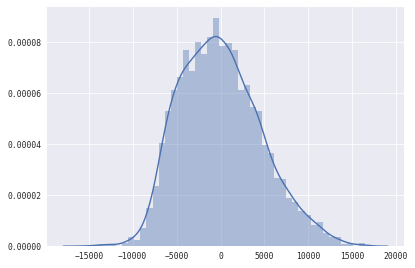

In [66]:
X = students[['POLARGrpOne']]
y = students['medianAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [67]:
X = students[['POLARGrpOne']]
y = students['upperAnnEarn']
lm = smf.ols(formula='y ~ X', data=students).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     704.5
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          2.89e-147
Time:                        21:52:34   Log-Likelihood:                -63810.
No. Observations:                6325   AIC:                         1.276e+05
Df Residuals:                    6323   BIC:                         1.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.969e+04    148.686    199.664      0.000    2.94e+04       3e+04
X           -293.5293     11.059    -26.542      0.000    -315.209    -271.850
==============================================================================
Omnibus:                      359.567   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.920
Skew:                           0.631   Prob(JB):                     1.46e-92
Kurtosis:                       3.103   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  2.88919077e-147]))
('Coefficients:', array([-293.52933476]))
('y-intercept:', 29687.166790249881)
('R-Squared:', 0.10024723485552123)


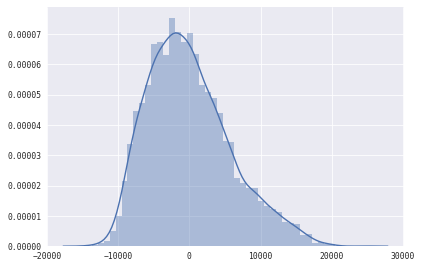

In [68]:
X = students[['POLARGrpOne']]
y = students['upperAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [69]:
X = students[['POLARGrpOne']]
y = students['lowerAnnEarn']
lm = smf.ols(formula='y ~ X', data=students).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     518.2
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          2.60e-110
Time:                        21:52:35   Log-Likelihood:                -61628.
No. Observations:                6325   AIC:                         1.233e+05
Df Residuals:                    6323   BIC:                         1.233e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.792e+04    105.301    170.211      0.000    1.77e+04    1.81e+04
X           -178.2855      7.832    -22.763      0.000    -193.639    -162.932
==============================================================================
Omnibus:                       82.824   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.068
Skew:                           0.270   Prob(JB):                     5.56e-19
Kurtosis:                       2.832   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  2.59606519e-110]))
('Coefficients:', array([-178.28553118]))
('y-intercept:', 17923.415840511763)
('R-Squared:', 0.075743278705167283)


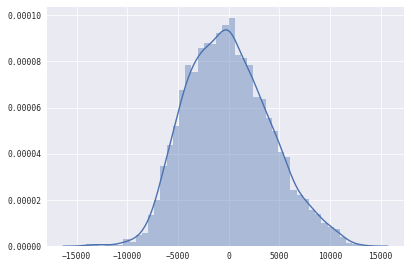

In [70]:
X = students[['POLARGrpOne']]
y = students['lowerAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

All of the R squared values got worse after removing the outliers!

#### Question: Was removing the outliers a sensible move? How can I improve these models? I could run a regression on the log transformed data?

#### Regression on the log transformed data:

In [71]:
X = log_students1[['POLARGrpOne']]
y = log_students1['medianAnnEarn']
lm = smf.ols(formula='y ~ X', data=log_students1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1067.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          8.99e-217
Time:                        21:52:42   Log-Likelihood:                 5628.9
No. Observations:                6475   AIC:                        -1.125e+04
Df Residuals:                    6473   BIC:                        -1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4732      0.005    903.261      0.000       4.463       4.483
X             -0.1581      0.005    -32.665      0.000      -0.168      -0.149
==============================================================================
Omnibus:                       32.786   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.804
Skew:                           0.026   Prob(JB):                     1.13e-10
Kurtosis:                       3.409   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  8.99025960e-217]))
('Coefficients:', array([-0.15805855]))
('y-intercept:', 4.4731809042623256)
('R-Squared:', 0.14151055239960808)


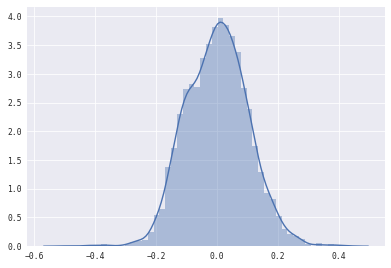

In [72]:
X = log_students1[['POLARGrpOne']]
y = log_students1['medianAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [73]:
X = log_students1[['POLARGrpOne']]
y = log_students1['lowerAnnEarn']
lm = smf.ols(formula='y ~ X', data=log_students1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     732.7
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          5.78e-153
Time:                        21:52:48   Log-Likelihood:                 4419.5
No. Observations:                6475   AIC:                            -8835.
Df Residuals:                    6473   BIC:                            -8821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3459      0.006    728.034      0.000       4.334       4.358
X             -0.1579      0.006    -27.069      0.000      -0.169      -0.146
==============================================================================
Omnibus:                      491.681   Durbin-Watson:                   0.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.500
Skew:                          -0.506   Prob(JB):                    2.52e-222
Kurtosis:                       4.661   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  5.77621897e-153]))
('Coefficients:', array([-0.1578816]))
('y-intercept:', 4.3458829640702756)
('R-Squared:', 0.10168649258755258)


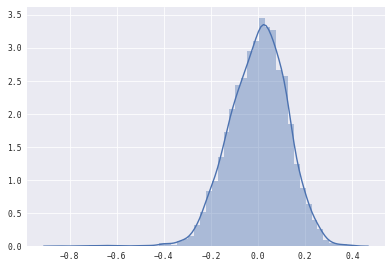

In [74]:
X = log_students1[['POLARGrpOne']]
y = log_students1['lowerAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [75]:
X = log_students1[['POLARGrpOne']]
y = log_students1['upperAnnEarn']
lm = smf.ols(formula='y ~ X', data=log_students1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1153.
Date:                Mon, 17 Jul 2017   Prob (F-statistic):          1.03e-232
Time:                        21:52:54   Log-Likelihood:                 5668.9
No. Observations:                6475   AIC:                        -1.133e+04
Df Residuals:                    6473   BIC:                        -1.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5764      0.005    929.825      0.000       4.567       4.586
X             -0.1633      0.005    -33.955      0.000      -0.173      -0.154
==============================================================================
Omnibus:                      202.089   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.080
Skew:                           0.404   Prob(JB):                     4.02e-51
Kurtosis:                       3.456   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

('P Values:', array([  1.02841932e-232]))
('Coefficients:', array([-0.16328945]))
('y-intercept:', 4.5764244048946123)
('R-Squared:', 0.15118348706571139)


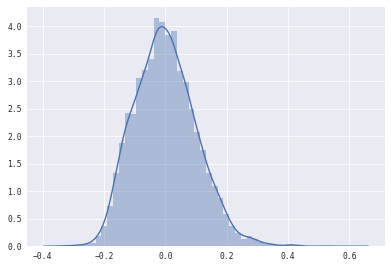

In [76]:
X = log_students1[['POLARGrpOne']]
y = log_students1['upperAnnEarn']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

The R squared values improve when the log transformed data is used. Perhaps I should use these data moving forward to more complex models?

#### Dummy variables

I need to get dummy variables for:
* Sex
* Provider Name
* Subject
* Years after graduation
* Prior attainment band

In [60]:
sexes = pd.get_dummies(students.sex, prefix = 'sexes')
providerNames = pd.get_dummies(students.providerName, prefix = 'providers')
subjects = pd.get_dummies(students.subject, prefix='subjects')
years = pd.get_dummies(students.yearsAfterGraduation, prefix = 'years')
priors = pd.get_dummies(students.prAttBand, prefix ='priors')

In [61]:
students = pd.concat([students, sexes, providerNames, subjects, years, priors], axis =1)

In [62]:
list(students.columns.values)

['UKPRN',
 'providerName',
 'Region',
 'subject',
 'sex',
 'yearsAfterGraduation',
 'grads',
 'unmatched',
 'matched',
 'activityNotCaptured',
 'noSustDest',
 'sustEmpOnly',
 'sustEmp',
 'sustEmpFSorBoth',
 'earningsInclude',
 'lowerAnnEarn',
 'medianAnnEarn',
 'upperAnnEarn',
 'POLARGrpOne',
 'POLARGrpOneIncluded',
 'prAttBand',
 'prAttIncluded',
 'sexes_Female',
 'sexes_Female + Male',
 'sexes_Male',
 'providers_Aberystwyth University',
 'providers_Anglia Ruskin University',
 'providers_Aston University',
 'providers_Bangor University',
 'providers_Bath Spa University',
 'providers_Birkbeck College',
 'providers_Birmingham City University',
 'providers_Bishop Grosseteste University',
 'providers_Bournemouth University',
 'providers_Brunel University London',
 'providers_Buckinghamshire New University',
 'providers_Canterbury Christ Church University',
 'providers_Cardiff Metropolitan University',
 'providers_Cardiff University',
 'providers_Conservatoire for Dance and Drama',
 'provi

### Multiple regression

In [63]:

lm = linear_model.LinearRegression()
X = students[['sexes_Female',
 'sexes_Female + Male',
 'sexes_Male',
 'providers_Anglia Ruskin University',
 'providers_Aston University',
 'providers_Bath Spa University',
 'providers_Birmingham City University',
 'providers_Bishop Grosseteste University',
 'providers_Bournemouth University',
 'providers_Brunel University London',
 'providers_Buckinghamshire New University',
 'providers_Canterbury Christ Church University',
 'providers_Conservatoire for Dance and Drama',
 'providers_Coventry University',
 'providers_De Montfort University',
 'providers_Edge Hill University',
 'providers_Falmouth University',
 'providers_Goldsmiths College',
 'providers_Guildhall School of Music and Drama',
 'providers_Harper Adams University',
 'providers_Heythrop College',
 'providers_Imperial College of Science Technology and Medicine',
 "providers_King's College London",
 'providers_Kingston University',
 'providers_Leeds Beckett University',
 'providers_Leeds College of Art',
 'providers_Leeds Trinity University',
 'providers_Liverpool Hope University',
 'providers_Liverpool John Moores University',
 'providers_London Metropolitan University',
 'providers_London School of Economics and Political Science',
 'providers_London South Bank University',
 'providers_Loughborough University',
 'providers_Middlesex University',
 'providers_Newman University',
 'providers_Norwich University of the Arts',
 'providers_Oxford Brookes University',
 'providers_Queen Mary University of London',
 'providers_Ravensbourne',
 'providers_Roehampton University',
 'providers_Rose Bruford College',
 'providers_Royal Holloway and Bedford New College',
 'providers_Royal Northern College of Music',
 'providers_Sheffield Hallam University',
 'providers_Southampton Solent University',
 "providers_St George's Hospital Medical School",
 "providers_St Mary's University Twickenham",
 'providers_Staffordshire University',
 'providers_Teesside University',
 'providers_The Arts University Bournemouth',
 'providers_The City University',
 'providers_The Liverpool Institute for Performing Arts',
 'providers_The Manchester Metropolitan University',
 'providers_The Nottingham Trent University',
 'providers_The Open University in England16',
 'providers_The Royal Central School of Speech and Drama',
 'providers_The Royal Veterinary College',
 'providers_The School of Oriental and African Studies',
 'providers_The University of Bath',
 'providers_The University of Birmingham',
 'providers_The University of Bolton',
 'providers_The University of Bradford',
 'providers_The University of Brighton',
 'providers_The University of Bristol',
 'providers_The University of Cambridge',
 'providers_The University of Central Lancashire',
 'providers_The University of Chichester',
 'providers_The University of East Anglia',
 'providers_The University of East London',
 'providers_The University of Essex',
 'providers_The University of Exeter',
 'providers_The University of Greenwich',
 'providers_The University of Huddersfield',
 'providers_The University of Hull',
 'providers_The University of Keele',
 'providers_The University of Kent',
 'providers_The University of Lancaster',
 'providers_The University of Leeds',
 'providers_The University of Leicester',
 'providers_The University of Lincoln',
 'providers_The University of Liverpool',
 'providers_The University of Manchester',
 'providers_The University of Northampton',
 'providers_The University of Oxford',
 'providers_The University of Portsmouth',
 'providers_The University of Reading',
 'providers_The University of Salford',
 'providers_The University of Sheffield',
 'providers_The University of Southampton',
 'providers_The University of Sunderland',
 'providers_The University of Surrey',
 'providers_The University of Sussex',
 'providers_The University of Warwick',
 'providers_The University of West London',
 'providers_The University of Westminster',
 'providers_The University of Winchester',
 'providers_The University of Wolverhampton',
 'providers_The University of York',
 'providers_Trinity Laban Conservatoire of Music and Dance',
 'providers_University Campus Suffolk',
 'providers_University College Birmingham',
 'providers_University College London',
 'providers_University for the Creative Arts',
 'providers_University of Bedfordshire',
 'providers_University of Chester',
 'providers_University of Cumbria',
 'providers_University of Derby',
 'providers_University of Durham',
 'providers_University of Gloucestershire',
 'providers_University of Hertfordshire',
 'providers_University of Newcastle-upon-Tyne',
 'providers_University of Northumbria at Newcastle',
 'providers_University of Nottingham',
 'providers_University of Plymouth',
 'providers_University of St Mark and St John',
 'providers_University of Worcester',
 'providers_University of the Arts London',
 'providers_University of the West of England Bristol',
 'providers_Writtle College',
 'providers_York St John University',
 'subjects_Agriculture & related subjects',
 'subjects_Architecture building & planning',
 'subjects_Biological sciences',
 'subjects_Business & administrative studies',
 'subjects_Combined',
 'subjects_Computer science',
 'subjects_Creative arts & design',
 'subjects_Economics',
 'subjects_Education',
 'subjects_Engineering & technology',
 'subjects_English studies',
 'subjects_Historical & philosophical studies',
 'subjects_Languages (excluding English studies)',
 'subjects_Law',
 'subjects_Mass communications & documentation',
 'subjects_Mathematical sciences',
 'subjects_Nursing',
 'subjects_Physical sciences',
 'subjects_Psychology',
 'subjects_Social studies (excluding economics)',
 'subjects_Subjects allied to medicine (excluding nursing)',
 'years_1',
 'years_3',
 'years_5',
 'priors_1.0',
 'priors_2.0',
 'priors_3.0','POLARGrpOne']]
y = students['medianAnnEarn']
get_linear_model_metrics(X, y, lm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

So now I have a model with a completely unreadable list of p values and coefficients. But a much higher R squared. How can I interpret these beta values?

The p values are all quite small I think. Then when you look at the coefficients, the first 3 are gender: they all have the same impact on the data? These numbers are huge! Surely this doesn't make sense. Next is institution. Next is subject. Years after graduation and prior attainment have the largest impact on the earnings I think. 

Standardisation - (of the continuous variables) because they will be in different scales, which will affect the beta values that I'm putting in. 

In [81]:
print(metrics.mean_squared_error(y, lm.predict(X)))

4258615.14549


I think this is a reasonable MSE? As my income values are in the tens of thousands, the errors are in the thousands. so at least an order of magnitude smaller. They are still not great though! 

#### Question: How can I actually interpret this when there are too many beta values to go through individually?

#### Multiple regression using cross validation

In [64]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring="neg_mean_squared_error")
score = np.mean(-scores)
print score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [83]:
scores = cross_val_score(lm, X, y, cv=20, scoring="neg_mean_squared_error")
score = np.mean(-scores)
print score

2.28362920989e+23


In [84]:
scores = cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")

score = np.mean(-scores)
print score

1.67056251546e+24


How has cross validation increased the MSE so much? Surely it shouldn't be this high?

Trying a different method of cross validation below brings the MSE down again?

In [85]:
from sklearn import cross_validation

kf = cross_validation.KFold(len(X), n_folds=5, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[train_index], lm.predict(X.iloc[train_index])))

print(np.mean(scores))

lm = linear_model.LinearRegression().fit(X, y)
print(metrics.mean_squared_error(y, lm.predict(X)))

/Users/rhiannonbritt/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


4231864.61157
4258615.14549


In [98]:
from sklearn import cross_validation

kf = cross_validation.KFold(len(X), n_folds=2, shuffle=True)
scores = []
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(y.iloc[train_index], lm.predict(X.iloc[train_index])))

print(np.mean(scores))

lm = linear_model.LinearRegression().fit(X, y)
print(metrics.mean_squared_error(y, lm.predict(X)))

4177631.1923
4258615.14549


So the MSE is slightly lower for the cross validated model. I'm not entirely sure how to interpret these values, they seem really high!


In [87]:
for i in range(2, 61, 2):
    kf = cross_validation.KFold(len(X), n_folds=i, shuffle=True)
    scores = []
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
        scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index])))
    print(np.mean(scores))

5.51290391387e+23
5.25363309118e+23
1.12327697585e+24
1.26049817127e+23
1.30166545536e+23
5.26230427105e+23
7.68041989878e+22
1.25390050378e+22
4.10671839869e+21
2.43944007462e+23
6.70546900468e+22
1.20676351127e+22
1.37669630503e+24
1.91998594289e+23
1.41162467705e+22
6.24799301832e+22
2.84290233065e+22
8.86921698927e+22
1.35490259321e+23
5.80850529938e+23
1.01129402242e+22
1.76833555891e+21
4.3856285197e+23
9.19950262726e+22
9.47204344646e+22
2.79507006276e+22
1.81370549752e+23
7.42400671111e+22
2.45323375656e+24
1.70513403656e+23


Surely these MSE values are far too high? Have I made a mistake?

#### Lasso and Ridge

In [99]:
lm = linear_model.LinearRegression().fit(X, y)
print(metrics.mean_squared_error(y, lm.predict(X)))
lm = linear_model.Lasso().fit(X, y)
print(metrics.mean_squared_error(y, lm.predict(X)))
lm = linear_model.Ridge().fit(X, y)
print(metrics.mean_squared_error(y, lm.predict(X)))

4258615.14549
4309334.93601
4271667.49303


So these beta values show that the linear regression model works the best. This isn't what I was expecting. Should I try cross validation on the Lasso and Ridge models?

#### Question: How can I find out what the Beta values are for each of these models?

In [102]:
from sklearn import grid_search
#The estimaor is the model you want to uild - OLS, lasso, ridge
#we have provided a list of alphas without cross validation in this case
#We need to tell it what we want it to minimise. in this case we want to minimise MSE
alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(X, y)

print -gs.best_score_ # mean squared error here comes in negative, so let's make it positive.
print gs.best_estimator_ # explains which grid_search setup worked best
print gs.grid_scores_ # shows all the grid pairings and their performances. all of the scores

#This tells you at the beginning the best model

5062015.74623
Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
[mean: -5062015.74623, std: 426474.57029, params: {'alpha': 1e-10}, mean: -5069975.69822, std: 415459.96755, params: {'alpha': 1.0000000000000001e-09}, mean: -5070802.78193, std: 414316.22971, params: {'alpha': 1e-08}, mean: -5070890.03311, std: 414195.58348, params: {'alpha': 9.9999999999999995e-08}, mean: -5070898.41833, std: 414184.00526, params: {'alpha': 9.9999999999999995e-07}, mean: -5070899.08816, std: 414183.24355, params: {'alpha': 1.0000000000000001e-05}, mean: -5070897.57872, std: 414186.97660, params: {'alpha': 0.0001}, mean: -5070881.74271, std: 414225.40889, params: {'alpha': 0.001}, mean: -5070728.25445, std: 414610.55158, params: {'alpha': 0.01}, mean: -5069652.79646, std: 418511.81325, params: {'alpha': 0.10000000000000001}, mean: -5085725.06005, std: 454782.11197, params: {'alpha': 1.0}, mean: -5486498.54250, std: 583333.31

The Ridge model still performs worse than the linear regression model does!

#### Normalisation
Lets try and normalise the POLARGrpOne data to see if our model performs any better. To do this I will use the formula:

z = Xi - Mean(x)
    Standard dev
   

In [103]:
students['normalPOLAR'] = (students['POLARGrpOne'] - students.POLARGrpOne.mean()) / (students.POLARGrpOne.std())

In [104]:
students.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,subjects_Psychology,subjects_Social studies (excluding economics),subjects_Subjects allied to medicine (excluding nursing),years_1,years_3,years_5,priors_1.0,priors_2.0,priors_3.0,normalPOLAR
44,10007146,The University of Greenwich,London,Agriculture & related subjects,Female,1,60.0,0.0,60.0,6.7,...,0,0,0,1,0,0,0,0,1,0.241445
46,10040812,Harper Adams University,West Midlands,Agriculture & related subjects,Female,1,150.0,0.7,145.0,3.4,...,0,0,0,1,0,0,0,1,0,-0.891101
84,10004797,The Nottingham Trent University,East Midlands,Agriculture & related subjects,Female,1,125.0,0.0,125.0,11.2,...,0,0,0,1,0,0,0,1,0,0.513256
202,10007146,The University of Greenwich,London,Architecture building & planning,Female,1,50.0,0.0,50.0,22.9,...,0,0,0,1,0,0,0,0,1,1.102181
222,10003957,Liverpool John Moores University,North West,Architecture building & planning,Female,1,45.0,2.2,45.0,NaN,...,0,0,0,1,0,0,0,1,0,-0.302177


#### Question: I now have minus values - is that a problem?

('P Values:', array([  3.65555311e-016,   2.63203096e-015,   2.73073384e-001,
         1.81352880e-002,   3.86577374e-012,   7.93634985e-003,
         1.07356926e-001,   8.42600853e-003,   1.41080457e-004,
         8.19947403e-005,   1.00492641e-001,   5.19503748e-001,
         2.56641393e-005,   1.76076887e-001,   4.33802780e-003,
         7.57202643e-008,   5.19994665e-006,   1.07745235e-001,
         3.85968701e-005,   8.30572031e-001,   6.90166123e-001,
         4.28632999e-007,   3.20969415e-008,   3.01323855e-001,
         7.49972438e-002,   1.77082266e-001,   4.75454203e-004,
         8.99393011e-011,   3.33732621e-003,   5.34813072e-002,
         2.52894990e-006,   8.98216921e-002,   5.43619476e-014,
         2.53124806e-002,   3.35035106e-001,   5.14891047e-004,
         1.51451420e-003,   1.02412318e-002,   3.22068624e-001,
         1.47705097e-001,   7.23160555e-004,   8.81115331e-002,
         1.05333190e-001,   5.17270139e-001,   3.42495960e-001,
         8.38559779e-002, 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

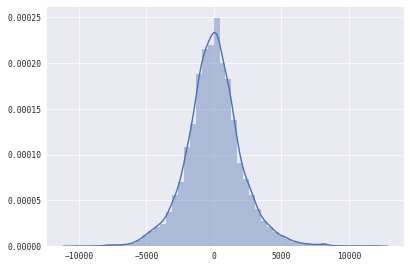

In [112]:
lm = linear_model.LinearRegression()
Z = students[['sexes_Female',
 'sexes_Female + Male',
 'sexes_Male',
 'providers_Anglia Ruskin University',
 'providers_Aston University',
 'providers_Bath Spa University',
 'providers_Birmingham City University',
 'providers_Bishop Grosseteste University',
 'providers_Bournemouth University',
 'providers_Brunel University London',
 'providers_Buckinghamshire New University',
 'providers_Canterbury Christ Church University',
 'providers_Conservatoire for Dance and Drama',
 'providers_Coventry University',
 'providers_De Montfort University',
 'providers_Edge Hill University',
 'providers_Falmouth University',
 'providers_Goldsmiths College',
 'providers_Guildhall School of Music and Drama',
 'providers_Harper Adams University',
 'providers_Heythrop College',
 'providers_Imperial College of Science Technology and Medicine',
 "providers_King's College London",
 'providers_Kingston University',
 'providers_Leeds Beckett University',
 'providers_Leeds College of Art',
 'providers_Leeds Trinity University',
 'providers_Liverpool Hope University',
 'providers_Liverpool John Moores University',
 'providers_London Metropolitan University',
 'providers_London School of Economics and Political Science',
 'providers_London South Bank University',
 'providers_Loughborough University',
 'providers_Middlesex University',
 'providers_Newman University',
 'providers_Norwich University of the Arts',
 'providers_Oxford Brookes University',
 'providers_Queen Mary University of London',
 'providers_Ravensbourne',
 'providers_Roehampton University',
 'providers_Rose Bruford College',
 'providers_Royal Holloway and Bedford New College',
 'providers_Royal Northern College of Music',
 'providers_Sheffield Hallam University',
 'providers_Southampton Solent University',
 "providers_St George's Hospital Medical School",
 "providers_St Mary's University Twickenham",
 'providers_Staffordshire University',
 'providers_Teesside University',
 'providers_The Arts University Bournemouth',
 'providers_The City University',
 'providers_The Liverpool Institute for Performing Arts',
 'providers_The Manchester Metropolitan University',
 'providers_The Nottingham Trent University',
 'providers_The Open University in England16',
 'providers_The Royal Central School of Speech and Drama',
 'providers_The Royal Veterinary College',
 'providers_The School of Oriental and African Studies',
 'providers_The University of Bath',
 'providers_The University of Birmingham',
 'providers_The University of Bolton',
 'providers_The University of Bradford',
 'providers_The University of Brighton',
 'providers_The University of Bristol',
 'providers_The University of Cambridge',
 'providers_The University of Central Lancashire',
 'providers_The University of Chichester',
 'providers_The University of East Anglia',
 'providers_The University of East London',
 'providers_The University of Essex',
 'providers_The University of Exeter',
 'providers_The University of Greenwich',
 'providers_The University of Huddersfield',
 'providers_The University of Hull',
 'providers_The University of Keele',
 'providers_The University of Kent',
 'providers_The University of Lancaster',
 'providers_The University of Leeds',
 'providers_The University of Leicester',
 'providers_The University of Lincoln',
 'providers_The University of Liverpool',
 'providers_The University of Manchester',
 'providers_The University of Northampton',
 'providers_The University of Oxford',
 'providers_The University of Portsmouth',
 'providers_The University of Reading',
 'providers_The University of Salford',
 'providers_The University of Sheffield',
 'providers_The University of Southampton',
 'providers_The University of Sunderland',
 'providers_The University of Surrey',
 'providers_The University of Sussex',
 'providers_The University of Warwick',
 'providers_The University of West London',
 'providers_The University of Westminster',
 'providers_The University of Winchester',
 'providers_The University of Wolverhampton',
 'providers_The University of York',
 'providers_Trinity Laban Conservatoire of Music and Dance',
 'providers_University Campus Suffolk',
 'providers_University College Birmingham',
 'providers_University College London',
 'providers_University for the Creative Arts',
 'providers_University of Bedfordshire',
 'providers_University of Chester',
 'providers_University of Cumbria',
 'providers_University of Derby',
 'providers_University of Durham',
 'providers_University of Gloucestershire',
 'providers_University of Hertfordshire',
 'providers_University of Newcastle-upon-Tyne',
 'providers_University of Northumbria at Newcastle',
 'providers_University of Nottingham',
 'providers_University of Plymouth',
 'providers_University of St Mark and St John',
 'providers_University of Worcester',
 'providers_University of the Arts London',
 'providers_University of the West of England Bristol',
 'providers_Writtle College',
 'providers_York St John University',
 'subjects_Agriculture & related subjects',
 'subjects_Architecture building & planning',
 'subjects_Biological sciences',
 'subjects_Business & administrative studies',
 'subjects_Combined',
 'subjects_Computer science',
 'subjects_Creative arts & design',
 'subjects_Economics',
 'subjects_Education',
 'subjects_Engineering & technology',
 'subjects_English studies',
 'subjects_Historical & philosophical studies',
 'subjects_Languages (excluding English studies)',
 'subjects_Law',
 'subjects_Mass communications & documentation',
 'subjects_Mathematical sciences',
 'subjects_Nursing',
 'subjects_Physical sciences',
 'subjects_Psychology',
 'subjects_Social studies (excluding economics)',
 'subjects_Subjects allied to medicine (excluding nursing)',
 'years_1',
 'years_3',
 'years_5',
 'priors_1.0',
 'priors_2.0',
 'priors_3.0','normalPOLAR']]
y = students['medianAnnEarn']
get_linear_model_metrics(Z, y, lm)

In [113]:
print(metrics.mean_squared_error(y, lm.predict(Z)))

4260365.13138


In [114]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, Z, y, cv=10, scoring="neg_mean_squared_error")
score = np.mean(-scores)
print score

4.05761102407e+26


In [115]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, Z, y, cv=100, scoring="neg_mean_squared_error")
score = np.mean(-scores)
print score

2.56858169217e+27


In [116]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, Z, y, cv=2, scoring="neg_mean_squared_error")
score = np.mean(-scores)
print score

3.12213691204e+28


### Logistic regression

The average income for students in this dataset is :

In [117]:
students.medianAnnEarn.mean()

20992.743083003952

Therefore I will try to predict, using a logistic regression model, whether the students will earn above or below this threshold. First I will create a True/False column for each student stating whether or not their median annual earnings are above this. 

In [118]:
students["above_average"] = students["medianAnnEarn"] > 20992


In [119]:
students.above_average.describe()

count      6325
unique        2
top       False
freq       3360
Name: above_average, dtype: object

In [120]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

model = LogisticRegression()


In [121]:
model.get_params().keys()
# C is the regularisation parameter (lasso or ridge in linear regression) I think you use L1 or L2?


['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

Note: Not all of the model parameters are tuning parameters. 'C', 'penalty', 'fit_intercept' for example are tuning parameters, whereas 'n_jobs', 'verbose' or 'random_state' are not. Random state - there is randomness in the fitting procedure, if you fix this each time then it will give you exactly the same model each time. I think that you want to not specifiy this mostly, maybe unless you are doing different models on different samples?


In [122]:
# Set up a search grid for the parameters you want to tune in form of a dictionary with the tuning parameters as keys and lists of possible values

params = {'C':[0.1,1,10, 100],
          'penalty':['l1','l2'],
          'fit_intercept':[True,False]}

In [123]:
gs = model_selection.GridSearchCV(estimator=model,
                                  param_grid=params,
                                  cv=5,
                                  scoring='accuracy')

In [124]:
gs.fit(X,students['above_average'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [125]:

print gs.best_score_


0.714308300395


In [425]:

print gs.best_params_

{'penalty': 'l1', 'C': 100, 'fit_intercept': True}


In [427]:

results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_fit_intercept,param_penalty,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.034237,0.001653,0.649328,0.870553,0.1,True,l1,"{u'penalty': u'l1', u'C': 0.1, u'fit_intercept...",15,0.583399,...,0.500395,0.886166,0.894071,0.854348,0.623715,0.875692,0.006956,0.001076,0.131986,0.010974
1,0.022262,0.000805,0.670040,0.878972,0.1,True,l2,"{u'penalty': u'l2', u'C': 0.1, u'fit_intercept...",13,0.639526,...,0.543083,0.896245,0.894071,0.861067,0.631621,0.882213,0.003759,0.000076,0.117904,0.011643
2,0.019734,0.000725,0.649170,0.870593,0.1,False,l1,"{u'penalty': u'l1', u'C': 0.1, u'fit_intercept...",16,0.582609,...,0.500395,0.886166,0.894071,0.854348,0.623715,0.875692,0.000713,0.000067,0.132065,0.010947
3,0.017731,0.000754,0.669723,0.879170,0.1,False,l2,"{u'penalty': u'l2', u'C': 0.1, u'fit_intercept...",14,0.637945,...,0.543874,0.896640,0.896443,0.861265,0.631621,0.882609,0.000233,0.000052,0.118880,0.011756
4,0.028113,0.000687,0.699605,0.901897,1,True,l1,"{u'penalty': u'l1', u'C': 1, u'fit_intercept':...",9,0.566798,...,0.609486,0.912648,0.898814,0.888538,0.718577,0.908893,0.003300,0.000001,0.114739,0.009329
5,0.020292,0.000680,0.698498,0.899723,1,True,l2,"{u'penalty': u'l2', u'C': 1, u'fit_intercept':...",11,0.593676,...,0.595257,0.911067,0.898814,0.887154,0.711462,0.903360,0.000505,0.000005,0.111327,0.008611
6,0.022256,0.000680,0.699605,0.901937,1,False,l1,"{u'penalty': u'l1', u'C': 1, u'fit_intercept':...",9,0.566798,...,0.609486,0.912648,0.898814,0.888538,0.718577,0.908893,0.001693,0.000002,0.114739,0.009293
7,0.019809,0.000682,0.698024,0.899921,1,False,l2,"{u'penalty': u'l2', u'C': 1, u'fit_intercept':...",12,0.593676,...,0.595257,0.911067,0.898814,0.887352,0.709881,0.904150,0.000369,0.000012,0.111299,0.008626
8,0.068442,0.000939,0.712569,0.907273,10,True,l1,"{u'penalty': u'l1', u'C': 10, u'fit_intercept'...",5,0.545455,...,0.647431,0.918379,0.897233,0.891107,0.755731,0.913636,0.011121,0.000284,0.116751,0.009580
9,0.029424,0.001102,0.710514,0.907115,10,True,l2,"{u'penalty': u'l2', u'C': 10, u'fit_intercept'...",7,0.561265,...,0.626087,0.917787,0.899605,0.891502,0.749407,0.912253,0.006463,0.000622,0.115502,0.009097


In [ ]:
8. Choose the model with the best parameters and predict target variable values (here chosen for some of the values in the dataset)

#Interested in mean test score and parameters

In [437]:
import sklearn.linear_model as lm
from sklearn import dummy, metrics
model0 = dummy.DummyClassifier()
model0.fit(X, students['above_average'])
students['probability_0'] = model0.predict_proba(students[X[1:]]).T[1]
#T is transpose. 
#This top model is using the baseline to predict the probability of the plane being 
# delayed I think
#this is always 1 or 0 because this model will predict with 100% accuracy each time 
#(don't get confused and think that is because the model is great, iut'as not, its shit




# Actual fit on the data using Logistic Regression.
model1 = lm.LogisticRegression()
model.fit(X, students['above_average'])
students['probability_1'] = model.predict_proba(students[X[1:]]).T[1]

ValueError: Must pass DataFrame with boolean values only